# Data Prep

In [1]:
import warnings
warnings.filterwarnings("ignore")

### Importing Dependencies

In [2]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [3]:
# Reading the 'dataset_final.csv' file and storing the data in a data frame variable 'df'  
df = pd.read_csv('dataset_final.csv')  

### Viewing Dataset

In [4]:
# Checking values in dataset
df.head()

,Unnamed: 0,LOCATION,TIME,A0101,A0102,A0103,A0104,A0105,A0106,A0107,A0108,A0109,A0110,A0111,A0112,Value
0,19,Austria,1997,4108.906094,1371.341750,2728.457071,8056.509275,2796.687374,5112.427472,4742.453818,758.874407,4209.634418,3456.316018,4050.692980,5139.136800,105.0
1,20,Austria,1998,4134.874040,1453.494591,2756.667422,8293.207795,2806.232078,5477.970662,4853.885138,817.797209,4434.233937,3589.570129,4386.441689,5418.631930,106.0
2,21,Austria,1999,3512.134262,1309.272732,2345.518001,7587.366398,2488.730213,4901.367888,4352.972547,767.458724,3957.853337,2987.631369,3940.088034,4711.042975,101.0
3,22,Austria,2000,3668.050761,1348.232551,2392.914897,7949.323076,2632.448811,5102.293726,4649.665077,1081.369088,4194.190239,3102.788189,4180.520262,5065.905120,90.0
4,23,Austria,2001,3818.863899,1371.184839,2440.900536,8222.266815,2596.414954,5276.760465,4635.502159,1081.188711,4309.585478,3198.814951,4141.896514,5107.650291,93.0


### Dropping Unwanted column

In [5]:
# Dropping the 'Unnamed: 0' column from the data frame 'df'  
# 'axis=1' specifies that we want to drop a column and not a row  
df = df.drop(['Unnamed: 0'], axis=1)

### Mapping Location values to Integers

In [6]:
# Finding each country in dataset
set(df.LOCATION)

{'Austria',
 'Belgium',
 'Denmark',
 'Estonia',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Hungary',
 'Iceland',
 'Ireland',
 'Italy',
 'Latvia',
 'Lithuania',
 'Luxembourg',
 'Netherlands',
 'Norway',
 'Poland',
 'Portugal',
 'Slovenia',
 'Spain',
 'Sweden',
 'Switzerland',
 'Türkiye',
 'United Kingdom'}

In [7]:
# Mapping countries in dataset to integer values
mymap = {'Austria':1, 'Belgium':2, 'Denmark':3, 'Estonia':4, 'Finland':5, 'France':6, 'Germany':7, 'Greece':8, 'Hungary':9, 'Iceland':10, 'Ireland':11, 'Italy':12, 'Latvia':13, 'Lithuania':14, 'Luxembourg':15, 'Netherlands':16, 'Norway':17, 'Poland':18, 'Portugal':19, 'Slovenia':20, 'Spain':21, 'Sweden':22, 'Switzerland':23, 'Türkiye':24, 'United Kingdom':25}

In [8]:
# Appling map to df, making counties integer values
df = df.applymap(lambda k: mymap.get(k) if k in mymap else k)

In [9]:
# Checking that there are 25 countries in dataset
len(set(df.LOCATION))

25

In [10]:
# Displaying each country and their values
print(mymap)

{'Austria': 1, 'Belgium': 2, 'Denmark': 3, 'Estonia': 4, 'Finland': 5, 'France': 6, 'Germany': 7, 'Greece': 8, 'Hungary': 9, 'Iceland': 10, 'Ireland': 11, 'Italy': 12, 'Latvia': 13, 'Lithuania': 14, 'Luxembourg': 15, 'Netherlands': 16, 'Norway': 17, 'Poland': 18, 'Portugal': 19, 'Slovenia': 20, 'Spain': 21, 'Sweden': 22, 'Switzerland': 23, 'Türkiye': 24, 'United Kingdom': 25}


### Detecting Outliers

<AxesSubplot:xlabel='TIME', ylabel='A0102'>

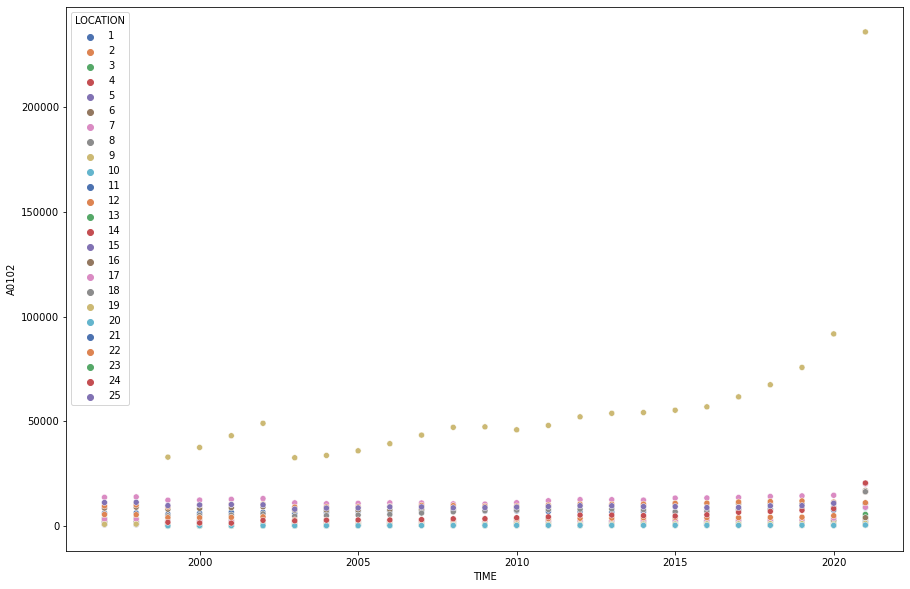

In [11]:
# Food Value over time 
plt.figure(figsize=(15,10))
sns.scatterplot(data=df, x="TIME", y="A0102", hue="LOCATION", palette="deep")

<AxesSubplot:xlabel='TIME', ylabel='A0102'>

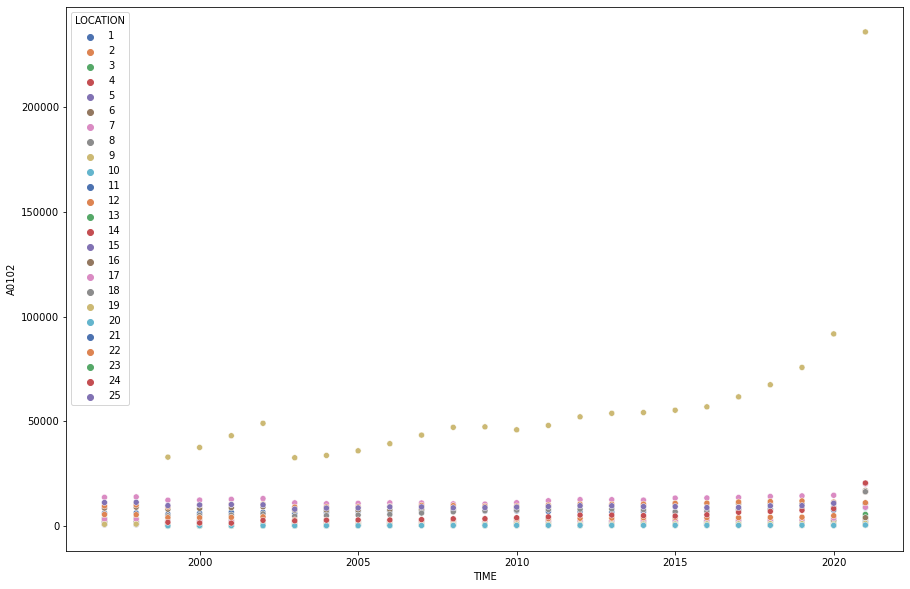

In [12]:
# Alcohol Value over time 
plt.figure(figsize=(15,10))
sns.scatterplot(data=df, x="TIME", y="A0102", hue="LOCATION", palette="deep")

In [13]:
# Row 270 - shows Hungary 2021 is an outlier - Hungary in general is very expensive
df.iloc[265:275,:]

,LOCATION,TIME,A0101,A0102,A0103,A0104,A0105,A0106,A0107,A0108,A0109,A0110,A0111,A0112,Value
265,9,2016,138200.427625,56966.218375,28849.797958,152288.550375,36551.763292,104543.012958,101200.102708,30052.375875,71201.013458,79385.083708,67564.458875,104819.985667,54.0
266,9,2017,150086.804000,61724.514125,31543.291375,172972.450042,39857.105917,108550.984458,107143.453042,30520.104708,80575.978875,84216.244375,72087.714083,111557.798083,57.0
267,9,2018,160901.488833,67486.597292,34596.452708,189862.930917,45025.044750,114790.812833,119096.050250,28674.273417,87801.519792,89502.540583,81721.786125,117951.622000,59.0
268,9,2019,174502.956417,75721.251125,36286.096167,212963.025958,51579.135000,121567.822750,127807.030042,28647.348375,96118.828500,96007.432500,91598.538500,131391.419458,58.0
269,9,2020,213199.198048,91709.172952,35861.044857,261264.337238,62403.992619,158468.944905,129086.956333,34286.893524,98220.468524,103350.602476,72157.509667,161878.407000,57.0
270,9,2021,548967.812889,235567.474333,92154.153111,668950.970667,160406.541111,399839.145111,331984.744778,88191.572556,252281.954778,262894.190778,185152.048444,416551.389778,59.0
271,11,1997,1806.020564,946.552909,993.978505,2623.830089,1000.649361,1964.740573,1597.618876,253.449880,1148.596561,1671.830328,1875.613020,1695.819076,100.0
272,11,1998,1840.579176,1017.264753,1125.038985,2949.135207,1108.426991,2041.546785,1771.252526,263.484993,1236.784884,1644.865402,2188.291372,1978.391567,100.0
273,11,1999,1608.231384,952.519301,1000.642821,2859.466560,1112.197427,1889.787253,1747.362381,251.351293,1170.641295,1547.073695,2070.520805,2026.378529,100.0
274,11,2000,1824.433280,1057.987333,1201.796596,3262.964166,1242.579882,1989.895159,2194.023492,396.829709,1360.513954,1645.486070,2298.666023,2177.360764,94.0


In [14]:
# Dropping the row with index 270 from the data frame 'df'  
# 'axis=0' specifies that we want to drop a row and not a column  
df = df.drop(labels=270, axis=0)  

<AxesSubplot:xlabel='TIME', ylabel='A0103'>

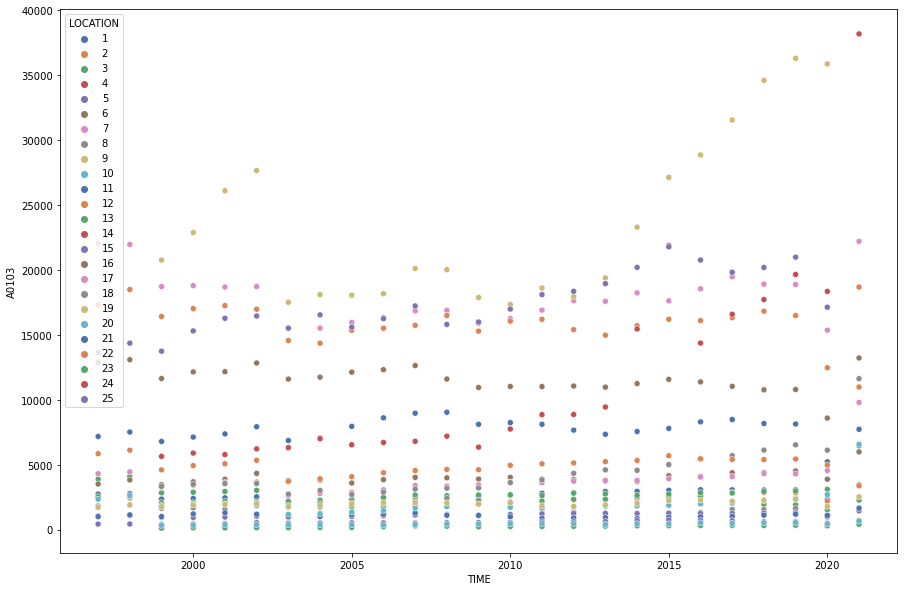

In [15]:
# Clothing Value over time 
plt.figure(figsize=(15,10))
sns.scatterplot(data=df, x="TIME", y="A0103", hue="LOCATION", palette="deep")

### Creating X, y labels

In [16]:
# Creating our features label and target variable
X = df.iloc[:,0:14]
y = df.iloc[:,-1]

In [17]:
X.head()

,LOCATION,TIME,A0101,A0102,A0103,A0104,A0105,A0106,A0107,A0108,A0109,A0110,A0111,A0112
0,1,1997,4108.906094,1371.341750,2728.457071,8056.509275,2796.687374,5112.427472,4742.453818,758.874407,4209.634418,3456.316018,4050.692980,5139.136800
1,1,1998,4134.874040,1453.494591,2756.667422,8293.207795,2806.232078,5477.970662,4853.885138,817.797209,4434.233937,3589.570129,4386.441689,5418.631930
2,1,1999,3512.134262,1309.272732,2345.518001,7587.366398,2488.730213,4901.367888,4352.972547,767.458724,3957.853337,2987.631369,3940.088034,4711.042975
3,1,2000,3668.050761,1348.232551,2392.914897,7949.323076,2632.448811,5102.293726,4649.665077,1081.369088,4194.190239,3102.788189,4180.520262,5065.905120
4,1,2001,3818.863899,1371.184839,2440.900536,8222.266815,2596.414954,5276.760465,4635.502159,1081.188711,4309.585478,3198.814951,4141.896514,5107.650291


In [18]:
y.head()

0    105.0
1    106.0
2    101.0
3     90.0
4     93.0
Name: Value, dtype: float64

### Visualisations

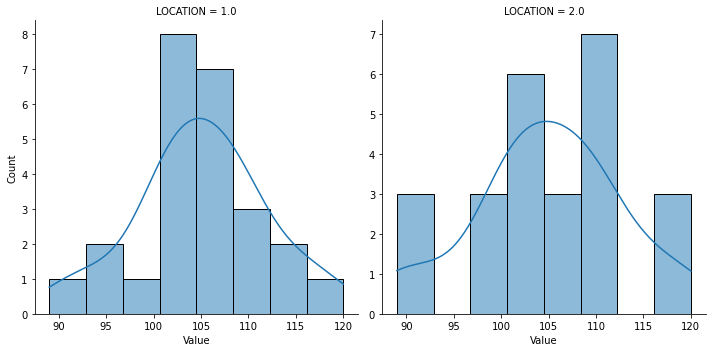

In [19]:
# Displot comparing two country's target value (Countries must be neighbouring in index)
sns.displot(
    data=df, x=y,
    # 0:50 is Austria vs Belgium
    col=df["LOCATION"][0:50],
    facet_kws=dict(sharey=False, sharex=False),
    kde=True)

<AxesSubplot:xlabel='TIME', ylabel='Value'>

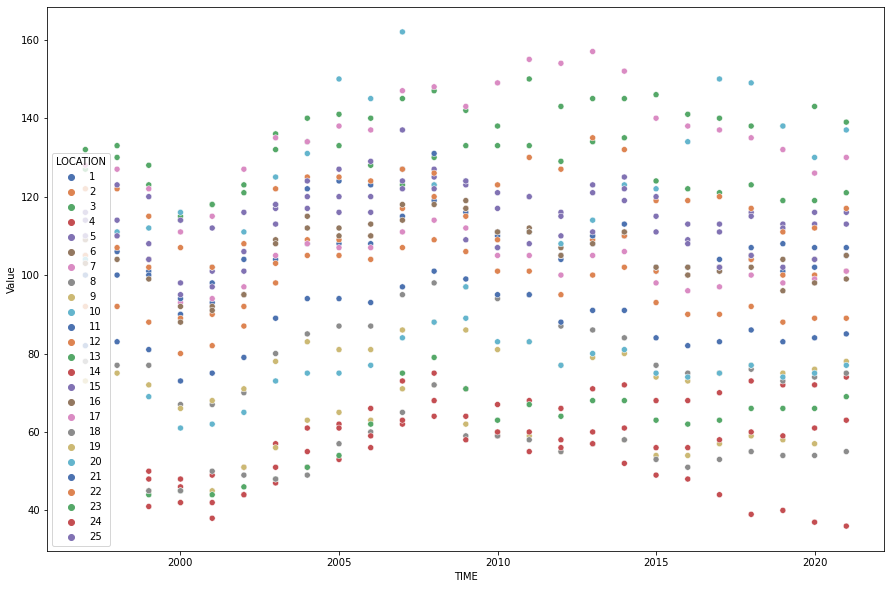

In [20]:
# Value over time 
plt.figure(figsize=(15,10))
sns.scatterplot(data=df, x="TIME", y="Value", hue="LOCATION", palette="deep")

# Modeling

In [21]:
# libraries

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import r2_score
import tensorflow as tf  
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras.optimizers import SGD
from scikeras.wrappers import KerasRegressor
from sklearn.preprocessing import StandardScaler  

2023-05-01 11:52:43.715944: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### RandomForest - No Normalization

In [22]:
# Split the data into training and testing sets  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  
  
# Create a RandomForestRegressor model and train it on the training data  
rfr = RandomForestRegressor()  
rfr.fit(X_train, y_train)  
  
# Make predictions on your training and test data  
y_train_pred = rfr.predict(X_train)  
y_test_pred = rfr.predict(X_test)  
  
# Calculate the R2 scores  
train_r2 = r2_score(y_train, y_train_pred)  
test_r2 = r2_score(y_test, y_test_pred)  
  
# Calculate the MSE scores  
train_mse = mean_squared_error(y_train, y_train_pred)  
test_mse = mean_squared_error(y_test, y_test_pred)  

print(f"R2 Training score: {train_r2:.3f}")  
print(f"R2 Testing score: {test_r2:.3f}") 
print()
print(f"MSE Training score: {train_mse:.3f}")  
print(f"MSE Testing score: {test_mse:.3f}")

R2 Training score: 0.984
R2 Testing score: 0.908

MSE Training score: 12.288
MSE Testing score: 62.650


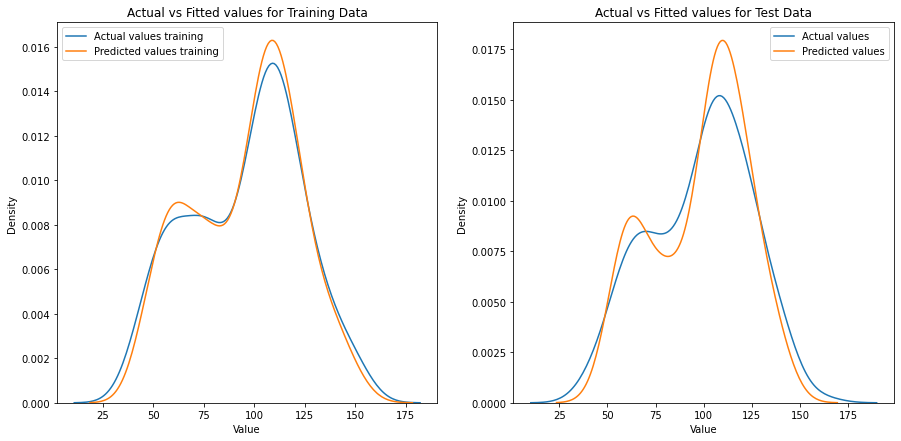

In [23]:
# Setting the size of the figure  
fig, axs = plt.subplots(ncols=2, figsize=(15, 7))  
  
# Plotting the distribution of the actual values in blue and the predicted values in orange for training data  
sns.distplot(y_train, hist=False, label="Actual values training", ax=axs[0])  
sns.distplot(y_train_pred, hist=False, label="Predicted values training", ax=axs[0])  
axs[0].legend()  
  
# Setting the title of the plot for training data  
axs[0].set_title("Actual vs Fitted values for Training Data")  
  
# Plotting the distribution of the actual values in blue and the predicted values in orange for test data  
sns.distplot(y_test, hist=False, label="Actual values", ax=axs[1])  
sns.distplot(y_test_pred, hist=False, label="Predicted values", ax=axs[1])  
axs[1].legend()  
  
# Setting the title of the plot for test data  
axs[1].set_title("Actual vs Fitted values for Test Data")  
  
# Displaying the plot
plt.show()

### RandomForest - Normalization

In [24]:
# Creating our features label and target variable
X = df.iloc[:,0:14]
y = df.iloc[:,-1]
y = y.values.reshape(-1,1)

PredictorScaler=StandardScaler()
TargetVarScaler=StandardScaler()
 
# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)
TargetVarScalerFit=TargetVarScaler.fit(y)
 
# Generating the standardized values of X and y
X_transform=PredictorScalerFit.transform(X)
y_transform=TargetVarScalerFit.transform(y)
 
# Split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X_transform, y_transform, test_size=0.3, random_state=42)
 
# Quick sanity check with the shapes of Training and testing datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(426, 14)
(426, 1)
(183, 14)
(183, 1)


In [25]:
# Create a RandomForestRegressor model and train it on the training data  
rfr = RandomForestRegressor()  
rfr.fit(X_train, y_train)  
  
# Make predictions on your training and test data  
y_train_pred = rfr.predict(X_train)  
y_test_pred = rfr.predict(X_test)  
  
# Calculate the R2 scores  
train_r2 = r2_score(y_train, y_train_pred)  
test_r2 = r2_score(y_test, y_test_pred)  
  
# Calculate the MSE scores  
train_mse = mean_squared_error(y_train, y_train_pred)  
test_mse = mean_squared_error(y_test, y_test_pred)  

print(f"R2 Training score: {train_r2:.3f}")  
print(f"R2 Testing score: {test_r2:.3f}") 
print()
print(f"MSE Training score: {train_mse:.3f}")  
print(f"MSE Testing score: {test_mse:.3f}")

R2 Training score: 0.986
R2 Testing score: 0.907

MSE Training score: 0.015
MSE Testing score: 0.084


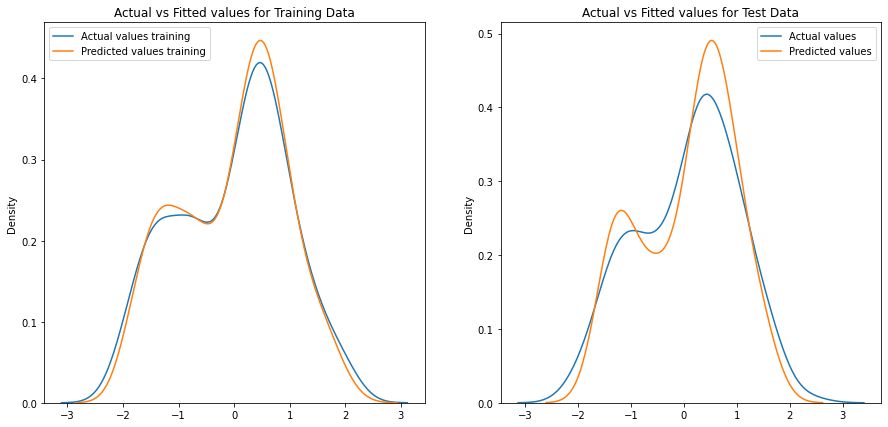

In [26]:
# Setting the size of the figure  
fig, axs = plt.subplots(ncols=2, figsize=(15, 7))  
  
# Plotting the distribution of the actual values in blue and the predicted values in orange for training data  
sns.distplot(y_train, hist=False, label="Actual values training", ax=axs[0])  
sns.distplot(y_train_pred, hist=False, label="Predicted values training", ax=axs[0])  
axs[0].legend()  
  
# Setting the title of the plot for training data  
axs[0].set_title("Actual vs Fitted values for Training Data")  
  
# Plotting the distribution of the actual values in blue and the predicted values in orange for test data  
sns.distplot(y_test, hist=False, label="Actual values", ax=axs[1])  
sns.distplot(y_test_pred, hist=False, label="Predicted values", ax=axs[1])  
axs[1].legend()  
  
# Setting the title of the plot for test data  
axs[1].set_title("Actual vs Fitted values for Test Data")  
  
# Displaying the plot
plt.show()

### RandomForest - Normalization GridSearchCV

In [27]:
# Creating our features label and target variable
X = df.iloc[:,0:14]
y = df.iloc[:,-1]
y = y.values.reshape(-1,1)

PredictorScaler=StandardScaler()
TargetVarScaler=StandardScaler()
 
# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)
TargetVarScalerFit=TargetVarScaler.fit(y)
 
# Generating the standardized values of X and y
X_transform=PredictorScalerFit.transform(X)
y_transform=TargetVarScalerFit.transform(y)
 
# Split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X_transform, y_transform, test_size=0.3, random_state=42)
 
# Quick sanity check with the shapes of Training and testing datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(426, 14)
(426, 1)
(183, 14)
(183, 1)


In [28]:
# Define the parameter grid to search over
parameters = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [29]:
# Create a RandomForestRegressor model
rfr = RandomForestRegressor()

# Create a GridSearchCV object and fit it to the data
model = GridSearchCV(rfr, parameters)
model.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200, 300]})

In [30]:
# Make predictions on your training and test data  
y_train_pred = model.predict(X_train)  
y_test_pred = model.predict(X_test)  
  
# Calculate the R2 scores  
train_r2 = r2_score(y_train, y_train_pred)  
test_r2 = r2_score(y_test, y_test_pred)  
  
# Calculate the MSE scores  
train_mse = mean_squared_error(y_train, y_train_pred)  
test_mse = mean_squared_error(y_test, y_test_pred)  

print(f"R2 Training score: {train_r2:.3f}")  
print(f"R2 Testing score: {test_r2:.3f}") 
print()
print(f"MSE Training score: {train_mse:.3f}")  
print(f"MSE Testing score: {test_mse:.3f}")

R2 Training score: 0.984
R2 Testing score: 0.904

MSE Training score: 0.016
MSE Testing score: 0.087


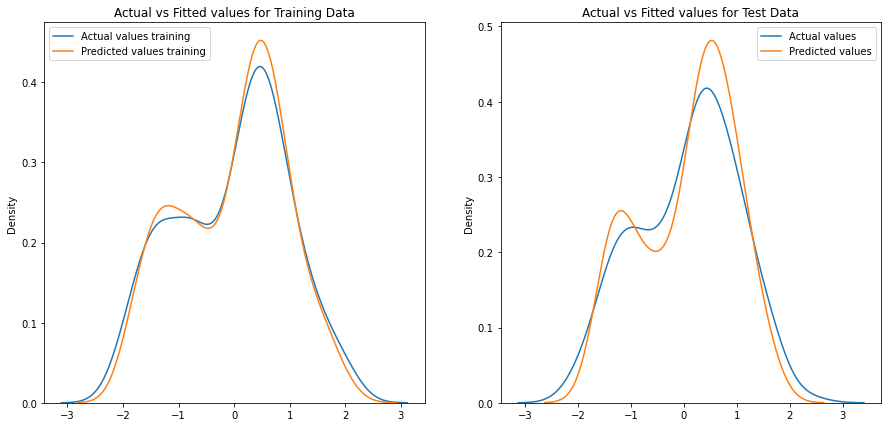

In [31]:
# Setting the size of the figure  
fig, axs = plt.subplots(ncols=2, figsize=(15, 7))  
  
# Plotting the distribution of the actual values in blue and the predicted values in orange for training data  
sns.distplot(y_train, hist=False, label="Actual values training", ax=axs[0])  
sns.distplot(y_train_pred, hist=False, label="Predicted values training", ax=axs[0])  
axs[0].legend()  
  
# Setting the title of the plot for training data  
axs[0].set_title("Actual vs Fitted values for Training Data")  
  
# Plotting the distribution of the actual values in blue and the predicted values in orange for test data  
sns.distplot(y_test, hist=False, label="Actual values", ax=axs[1])  
sns.distplot(y_test_pred, hist=False, label="Predicted values", ax=axs[1])  
axs[1].legend()  
  
# Setting the title of the plot for test data  
axs[1].set_title("Actual vs Fitted values for Test Data")  
  
# Displaying the plot
plt.show()

In [32]:
model.best_params_

{'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

In [33]:
# Accessing the best estimator from the trained model
model.best_estimator_

RandomForestRegressor(max_depth=10, n_estimators=300)

In [34]:
# Accessing the cross-validation results from the trained model  
model.cv_results_

{'mean_fit_time': array([0.08642592, 0.17025118, 0.34101143, 0.50791421, 0.07922783,
        0.15720992, 0.31321354, 0.46976337, 0.07253385, 0.14580183,
        0.2887476 , 0.43446612, 0.07742834, 0.15426655, 0.30633912,
        0.4620904 , 0.07509389, 0.15146613, 0.30453959, 0.45491714,
        0.07105875, 0.14203711, 0.28473949, 0.42537513, 0.06979327,
        0.13927479, 0.27992077, 0.42186561, 0.07104702, 0.14184303,
        0.27966137, 0.41858373, 0.06892419, 0.13765726, 0.27599144,
        0.41225138, 0.06373997, 0.13279886, 0.25373249, 0.37867212,
        0.06347041, 0.12594914, 0.25272446, 0.3791441 , 0.06236434,
        0.1246232 , 0.25077639, 0.37387037, 0.06251159, 0.12668695,
        0.25222864, 0.37801008, 0.06251922, 0.12506886, 0.24945025,
        0.37635889, 0.06237297, 0.12405262, 0.24784989, 0.37363558,
        0.06138339, 0.12284656, 0.24666581, 0.36988301, 0.06121325,
        0.12354951, 0.24668589, 0.37062936, 0.06175976, 0.1229774 ,
        0.24557047, 0.36773081,

In [35]:
# Accessing the keys of the cross-validation results dictionary from the trained model  
model.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_depth', 'param_min_samples_leaf', 'param_min_samples_split', 'param_n_estimators', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [36]:
# Accessing the mean test scores from the cross-validation results of the trained model  
model.cv_results_['mean_test_score']

array([0.86691731, 0.86193057, 0.86919835, 0.86774623, 0.86000337,
       0.86658839, 0.86425845, 0.86146597, 0.85877598, 0.85573088,
       0.85238616, 0.85344503, 0.85332176, 0.85552966, 0.85396468,
       0.85572249, 0.85933995, 0.85016347, 0.85855703, 0.85653207,
       0.83643598, 0.84442157, 0.84893473, 0.84580998, 0.8338111 ,
       0.83448081, 0.83777108, 0.83638365, 0.84220853, 0.83465622,
       0.83600507, 0.83790916, 0.8277593 , 0.8312258 , 0.83587844,
       0.83435455, 0.79733045, 0.79913525, 0.79950662, 0.79826167,
       0.79966578, 0.79972635, 0.80005727, 0.80039247, 0.79223296,
       0.79550387, 0.79826257, 0.7972498 , 0.78974453, 0.79670644,
       0.79719818, 0.79508707, 0.79114304, 0.79927107, 0.79925567,
       0.79818194, 0.79075487, 0.80476021, 0.79547775, 0.79440057,
       0.78620165, 0.78391369, 0.79105526, 0.78629287, 0.78490381,
       0.78248179, 0.78893235, 0.787424  , 0.7844636 , 0.78524755,
       0.79022615, 0.79050715, 0.86668692, 0.86193217, 0.86843

In [37]:
# Accessing the feature importances of the best estimator from the trained model  
model.best_estimator_.feature_importances_

array([0.06822039, 0.02915748, 0.26309888, 0.24628515, 0.01572102,
       0.01100003, 0.0109516 , 0.00915311, 0.01063611, 0.01434885,
       0.16572163, 0.02617205, 0.10076097, 0.02877275])

### Neural Network

In [38]:
# Creating our features label and target variable
X = df.iloc[:,0:14]
y = df.iloc[:,-1]
y = y.values.reshape(-1,1)

PredictorScaler=StandardScaler()
TargetVarScaler=StandardScaler()
 
# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)
TargetVarScalerFit=TargetVarScaler.fit(y)
 
# Generating the standardized values of X and y
X_transform=PredictorScalerFit.transform(X)
y_transform=TargetVarScalerFit.transform(y)
 
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_transform, y_transform, test_size=0.3, random_state=42)
 
# Quick sanity check with the shapes of Training and testing datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(426, 14)
(426, 1)
(183, 14)
(183, 1)


##### mean_squared_error

The Mean Squared Error, or MSE, loss is the default loss to use for regression
problems.
Mathematically, it is the preferred loss function under the inference framework of
maximum likelihood if the distribution of the target variable is Gaussian. It is the loss
function to be evaluated first and only changed if you have a good reason. 
Mean squared error is calculated as the average of the squared differences between the
predicted and actual values. The result is always positive regardless of the sign of the
predicted and actual values and a perfect value is 0.0. The squaring means that larger
mistakes result in more error than smaller mistakes, meaning that the model is punished
for making larger mistakes.

R², on the other hand, measures the proportion of variance in the target variable that is explained by the model. It ranges from 0 to 1, with higher values indicating better performance. R² represents the proportion of variance in the target variable that can be predicted by the independent variables in the model. An R² of 1 means that the model perfectly predicts the target variable based on the independent variables, while an R² of 0 means that the model is no better than predicting the mean of the target variable. 

In general, MSE is a more direct measure of the model's accuracy, while R² is a measure of the model's explanatory power. However, both metrics are useful in evaluating a regression model and should be used together to get a complete picture of the model's performance.

In [39]:
# define model
model = Sequential()
model.add(Dense(25, input_dim=(X_train.shape[1]), activation='relu',
kernel_initializer='he_uniform'))
model.add(Dense(1, activation='linear'))

2023-05-01 11:54:58.682498: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [40]:
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss='mean_squared_error', optimizer=opt, metrics=['mse'])

# fit model
history = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=100, verbose=0)

In [41]:
# Make predictions on your training and test data  
y_train_pred = model.predict(X_train)  
y_test_pred = model.predict(X_test)  
  
# Calculate the R2 scores  
train_r2 = r2_score(y_train, y_train_pred)  
test_r2 = r2_score(y_test, y_test_pred)  
  
# Calculate the MSE scores  
train_mse = mean_squared_error(y_train, y_train_pred)  
test_mse = mean_squared_error(y_test, y_test_pred)  

print(f"R2 Training score: {train_r2:.3f}")  
print(f"R2 Testing score: {test_r2:.3f}") 
print()
print(f"MSE Training score: {train_mse:.3f}")  
print(f"MSE Testing score: {test_mse:.3f}")

6/6 [==============================] - 0s 637us/step
R2 Training score: 0.863
R2 Testing score: 0.846

MSE Training score: 0.142
MSE Testing score: 0.139


Text(0, 0.5, 'Loss')

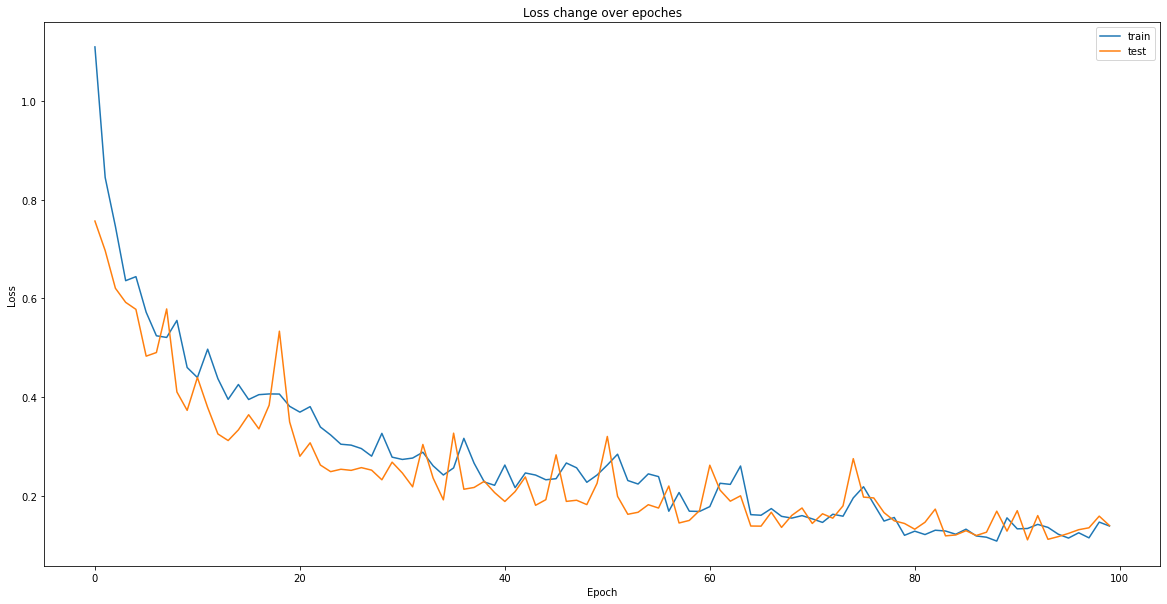

In [42]:
# plot loss during training
plt.figure(figsize=(20,10))
plt.title('Loss change over epoches')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss")

Text(0, 0.5, 'MSE')

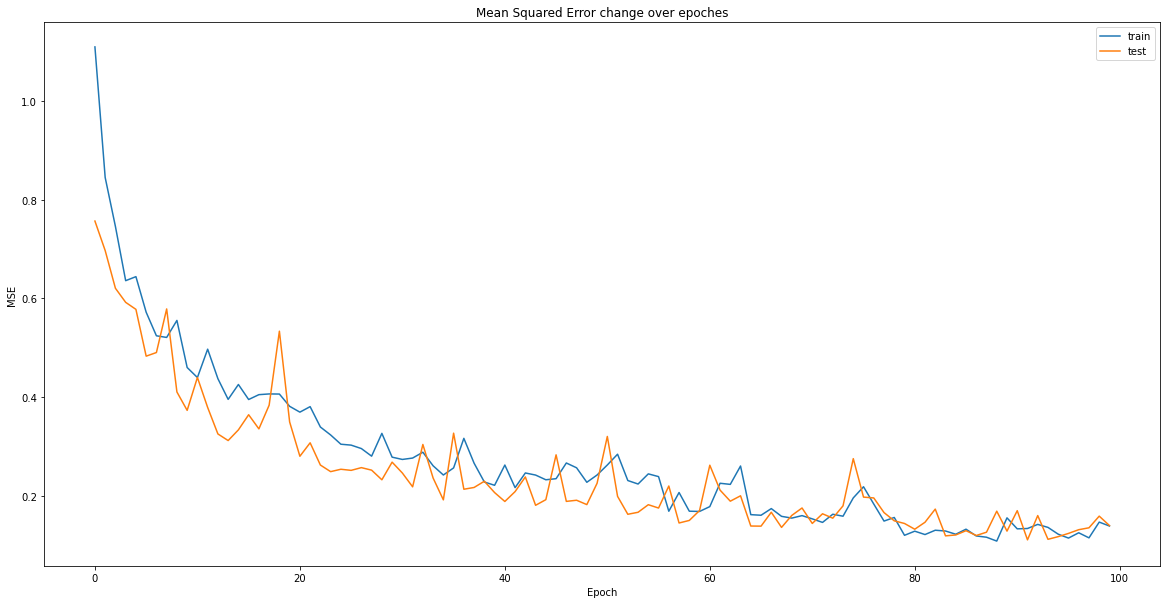

In [43]:
# plot mse during training
plt.figure(figsize=(20,10))
plt.title('Mean Squared Error change over epoches')
plt.plot(history.history['mse'], label='train')
plt.plot(history.history['val_mse'], label='test')
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("MSE")

##### mean_squared_logarithmic_error_loss

There may be regression problems in which the target value has a spread of values and
when predicting a large value, you may not want to punish a model as heavily as mean
squared error.
Instead, you can first calculate the natural logarithm of each of the predicted values,
then calculate the mean squared error. This is called the Mean Squared Logarithmic
Error loss, or MSLE for short.

In [44]:
# define model
model = Sequential()
model.add(Dense(25, input_dim=(X_train.shape[1]), activation='relu',
kernel_initializer='he_uniform'))
model.add(Dense(1, activation='linear'))

In [45]:
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='mean_squared_logarithmic_error', optimizer=opt, metrics=['mse'])

# fit model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, verbose=0)

In [46]:
# Make predictions on your training and test data  
y_train_pred = model.predict(X_train)  
y_test_pred = model.predict(X_test)  
  
# Calculate the R2 scores  
train_r2 = r2_score(y_train, y_train_pred)  
test_r2 = r2_score(y_test, y_test_pred)  
  
# Calculate the MSE scores  
train_mse = mean_squared_error(y_train, y_train_pred)  
test_mse = mean_squared_error(y_test, y_test_pred)  

print(f"R2 Training score: {train_r2:.3f}")  
print(f"R2 Testing score: {test_r2:.3f}") 
print()
print(f"MSE Training score: {train_mse:.3f}")  
print(f"MSE Testing score: {test_mse:.3f}")

6/6 [==============================] - 0s 643us/step
R2 Training score: -2.076
R2 Testing score: -1.496

MSE Training score: 3.193
MSE Testing score: 2.259


Text(0, 0.5, 'Loss')

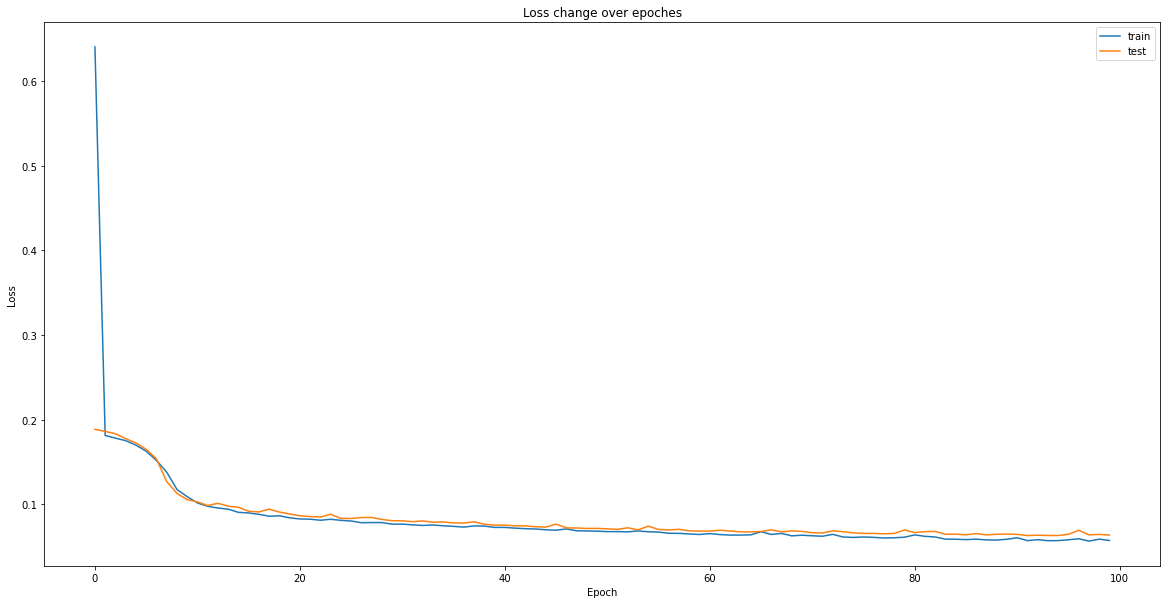

In [47]:
# plot loss during training
plt.figure(figsize=(20,10))
plt.title('Loss change over epoches')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss")

Text(0, 0.5, 'MSE')

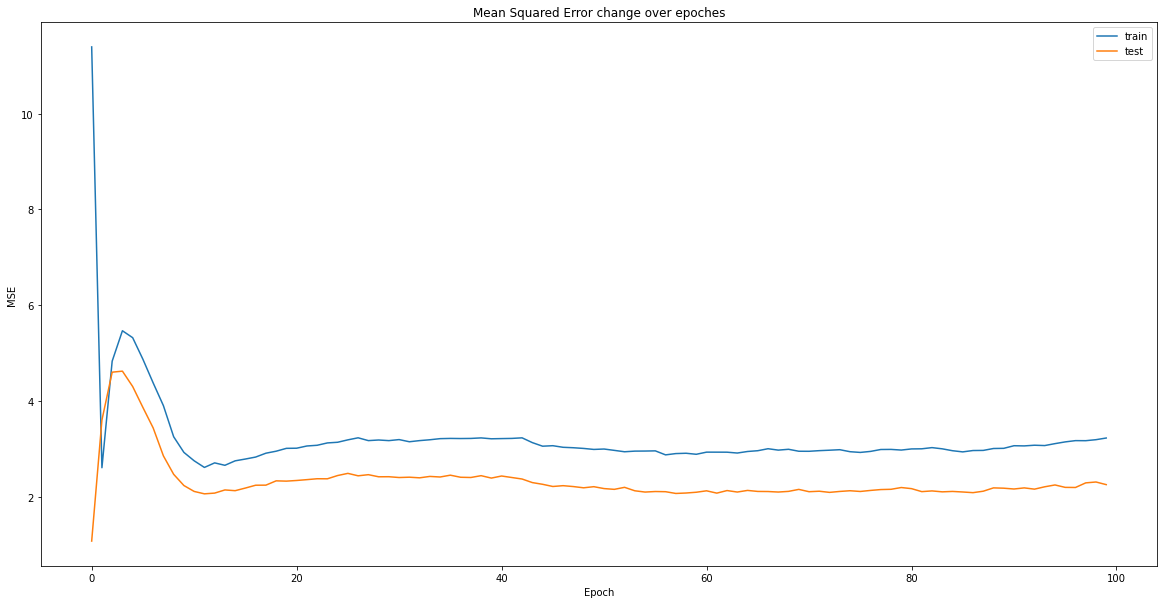

In [48]:
# plot mse during training
plt.figure(figsize=(20,10))
plt.title('Mean Squared Error change over epoches')
plt.plot(history.history['mse'], label='train')
plt.plot(history.history['val_mse'], label='test')
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("MSE")

##### Mean Absolute Error Loss

On some regression problems, the distribution of the target variable may be mostly
Gaussian, but may have outliers, e.g. large or small values far from the mean value.
The Mean Absolute Error, or MAE, loss is an appropriate loss function in this case as it
is more robust to outliers. It is calculated as the average of the absolute difference
between the actual and predicted values. 

In [49]:
# define model
model = Sequential()
model.add(Dense(25, input_dim=(X_train.shape[1]), activation='relu',
kernel_initializer='he_uniform'))
model.add(Dense(1, activation='linear'))

In [50]:
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='mean_absolute_error', optimizer=opt, metrics=['mse'])

# fit model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, verbose=0)

In [51]:
# Make predictions on your training and test data  
y_train_pred = model.predict(X_train)  
y_test_pred = model.predict(X_test)  
  
# Calculate the R2 scores  
train_r2 = r2_score(y_train, y_train_pred)  
test_r2 = r2_score(y_test, y_test_pred)  
  
# Calculate the MSE scores  
train_mse = mean_squared_error(y_train, y_train_pred)  
test_mse = mean_squared_error(y_test, y_test_pred)  

print(f"R2 Training score: {train_r2:.3f}")  
print(f"R2 Testing score: {test_r2:.3f}") 
print()
print(f"MSE Training score: {train_mse:.3f}")  
print(f"MSE Testing score: {test_mse:.3f}")

6/6 [==============================] - 0s 674us/step
R2 Training score: 0.844
R2 Testing score: 0.800

MSE Training score: 0.162
MSE Testing score: 0.181


Text(0, 0.5, 'Loss')

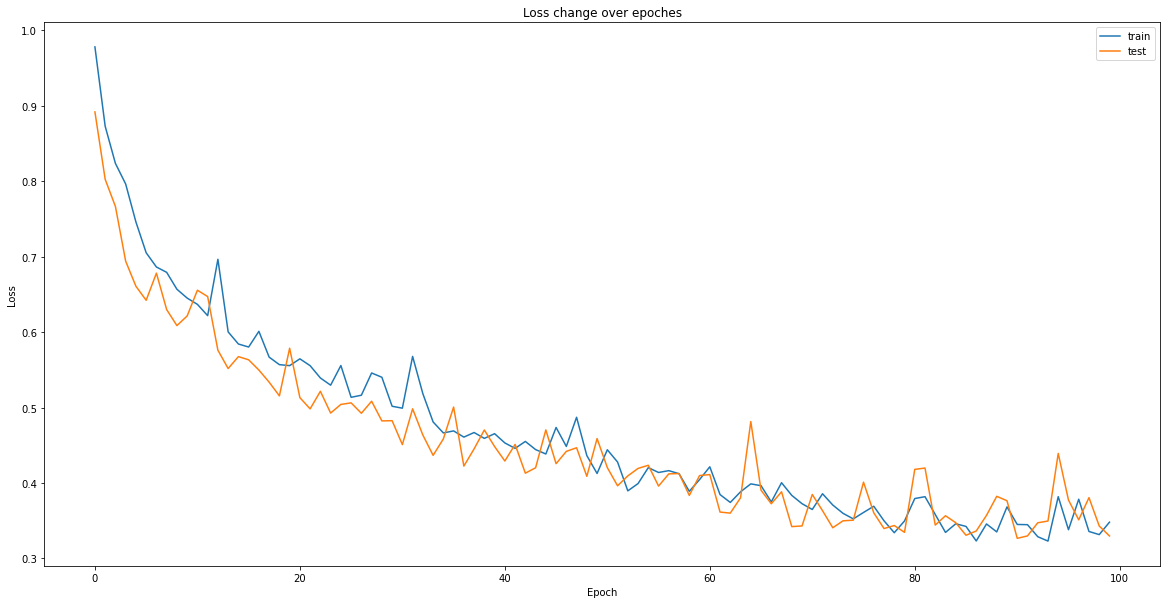

In [52]:
# plot loss during training
plt.figure(figsize=(20,10))
plt.title('Loss change over epoches')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss")

Text(0, 0.5, 'MSE')

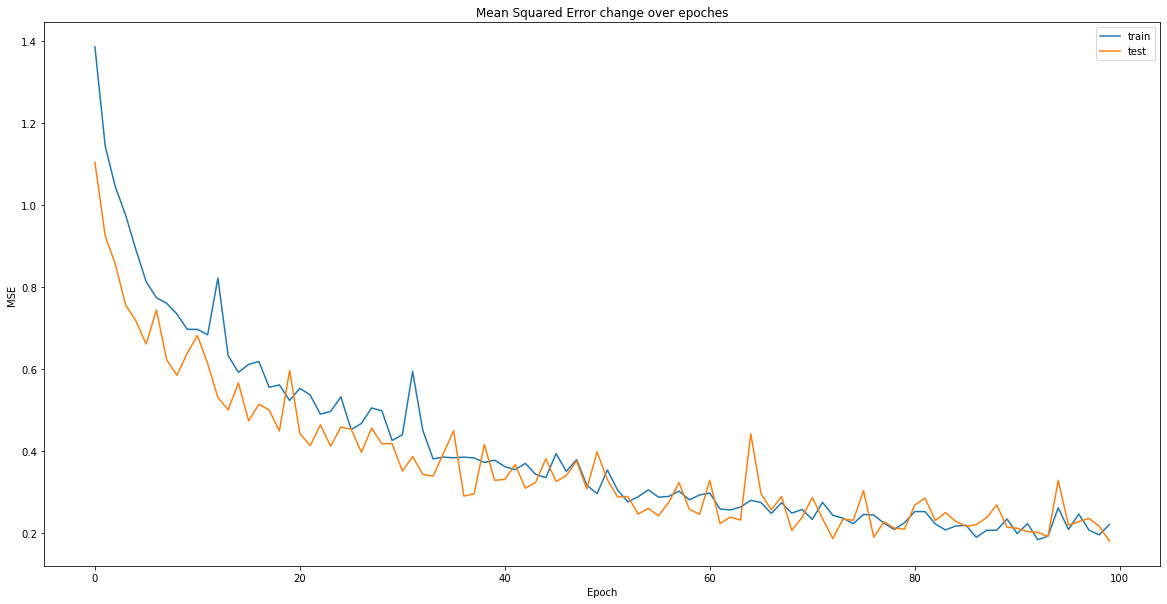

In [53]:
# plot mse during training
plt.figure(figsize=(20,10))
plt.title('Mean Squared Error change over epoches')
plt.plot(history.history['mse'], label='train')
plt.plot(history.history['val_mse'], label='test')
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("MSE")

Given that the best R² result was given by the Mean Squared Error loss function, we will keep using it.

## Tuning

We now rebuild the simplest NN using the MSE loss function and proceed with hyperparameter tuning.

In [54]:
# define model
model = Sequential()
model.add(Dense(25, input_dim=(X_train.shape[1])))
model.add(Dense(1, activation='linear'))

In [55]:
model.compile(loss='mean_squared_error')

# fit model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, verbose = 0)

In [56]:
# evaluate the model
train_mse = model.evaluate(X_train, y_train, verbose=0)
test_mse = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))

Train: 0.724, Test: 0.618


Text(0, 0.5, 'Loss')

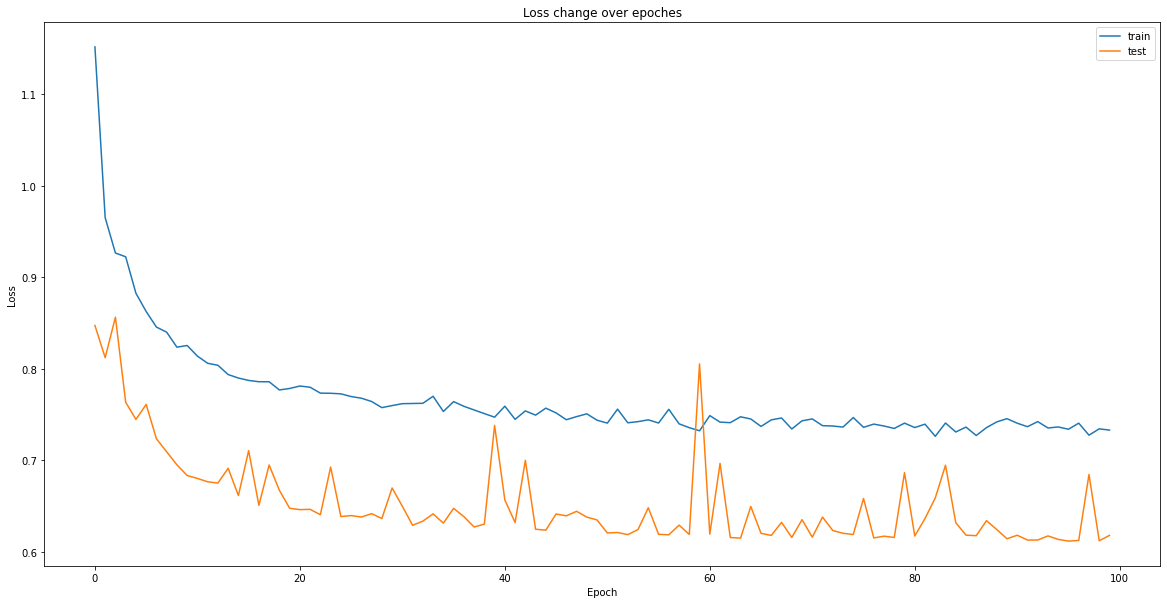

In [57]:
# plot loss during training
plt.figure(figsize=(20,10))
plt.title('Loss change over epoches')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss")

In [58]:
y_pred = model.predict(X_train)
r2 = r2_score(y_train, y_pred)  
print('R² Train:', r2)

y_pred = model.predict(X_test)
# Calculate the R²  
r2 = r2_score(y_test, y_pred)  
print('R² Test:', r2)

14/14 [==============================] - 0s 519us/step
R² Train: 0.3030914048119968
6/6 [==============================] - 0s 732us/step
R² Test: 0.31734642984411865


### GridSearchCV model

In [59]:
activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']

In [60]:
batch_size = [10, 20, 40, 50, 80]
epochs = [10, 50, 100, 500]

In [61]:
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']

In [62]:
learn_rate = [0.001, 0.01, 0.1, 0.3]

In [63]:
neurons = [1, 5, 10, 20, 30, 50, 80, 100, 150, 200]

In [64]:
init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']

#### Activation tuning

In [65]:
# hyperparameter dictionary
result_activation = {
    'softmax': 0,
    'softplus': 0, 
    'softsign': 0, 
    'relu': 0,
    'tanh': 0, 
    'sigmoid': 0, 
    'hard_sigmoid': 0, 
    'linear': 0
}

# parameters grid
param_grid = dict(
    model__activation = activation,
)

In [66]:
# Function to create model, required for KerasClassifier
def create_model(activation):
    # create model
    model = Sequential()
    model.add(Dense(25, input_dim=(X_train.shape[1]), activation=activation))
    model.add(Dense(1, activation='linear'))
 
    # Compile model
    model.compile(loss='mean_squared_error')
    return model

for i in range(5):
    # create model
    model = KerasRegressor(model=create_model, epochs=100, verbose=0)

    grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
    grid_result = grid.fit(X_train, y_train)
    
    result_activation[grid_result.best_params_["model__activation"]] += 1
    print("Cicle %i - Best: %f using %s" % (i+1, grid_result.best_score_, grid_result.best_params_))
    
result_activation

2023-05-01 11:55:13.305938: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-01 11:55:13.346746: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-01 11:55:13.349546: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the ap

Cicle 1 - Best: 0.544361 using {'model__activation': 'relu'}
Cicle 2 - Best: 0.531523 using {'model__activation': 'relu'}
Cicle 3 - Best: 0.547782 using {'model__activation': 'relu'}
Cicle 4 - Best: 0.551522 using {'model__activation': 'relu'}
Cicle 5 - Best: 0.531308 using {'model__activation': 'relu'}


{'softmax': 0,
 'softplus': 0,
 'softsign': 0,
 'relu': 5,
 'tanh': 0,
 'sigmoid': 0,
 'hard_sigmoid': 0,
 'linear': 0}

In [67]:
# define model
model = Sequential()
model.add(Dense(25, input_dim=(X_train.shape[1]), activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error')

# fit model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, verbose = 0)

# evaluate the model
train_mse = model.evaluate(X_train, y_train, verbose=0)
test_mse = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))

y_pred = model.predict(X_train)
r2 = r2_score(y_train, y_pred)  
print('R² Train:', r2)

y_pred = model.predict(X_test)
# Calculate the R²  
r2 = r2_score(y_test, y_pred)  
print('R² Test:', r2)

Train: 0.379, Test: 0.351
14/14 [==============================] - 0s 589us/step
R² Train: 0.6351392484358542
6/6 [==============================] - 0s 657us/step
R² Test: 0.6118990110372368


### init_mode tuning

In [68]:
# hyperparameter dictionary
result_init_mode = {
    'uniform': 0, 
    'lecun_uniform': 0, 
    'normal': 0, 
    'zero': 0, 
    'glorot_normal': 0, 
    'glorot_uniform': 0, 
    'he_normal': 0, 
    'he_uniform': 0
}

# parameters grid
param_grid = dict(
    model__init_mode = init_mode,
)

In [69]:
# Function to create model, required for KerasClassifier
def create_model(init_mode):
    # create model
    model = Sequential()
    model.add(Dense(25, input_dim=(X_train.shape[1]), activation="relu", kernel_initializer=init_mode))
    model.add(Dense(1, activation='linear'))
 
    # Compile model
    model.compile(loss='mean_squared_error')
    return model

for i in range(5):
    # create model
    model = KerasRegressor(model=create_model, epochs=100, verbose=0)

    grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
    grid_result = grid.fit(X_train, y_train)
    
    result_init_mode[grid_result.best_params_["model__init_mode"]] += 1
    print("Cicle %i - Best: %f using %s" % (i+1, grid_result.best_score_, grid_result.best_params_))
    
result_init_mode

Cicle 1 - Best: 0.596147 using {'model__init_mode': 'normal'}
Cicle 2 - Best: 0.601062 using {'model__init_mode': 'normal'}
Cicle 3 - Best: 0.587959 using {'model__init_mode': 'uniform'}
Cicle 4 - Best: 0.582755 using {'model__init_mode': 'normal'}
Cicle 5 - Best: 0.587348 using {'model__init_mode': 'normal'}


{'uniform': 1,
 'lecun_uniform': 0,
 'normal': 4,
 'zero': 0,
 'glorot_normal': 0,
 'glorot_uniform': 0,
 'he_normal': 0,
 'he_uniform': 0}

In [70]:
# define model
model = Sequential()
model.add(Dense(25, input_dim=(X_train.shape[1]), activation='relu', kernel_initializer='normal'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error')

# fit model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, verbose = 0)

# evaluate the model
train_mse = model.evaluate(X_train, y_train, verbose=0)
test_mse = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))

y_pred = model.predict(X_train)
r2 = r2_score(y_train, y_pred)  
print('R² Train:', r2)

y_pred = model.predict(X_test)
# Calculate the R²  
r2 = r2_score(y_test, y_pred)  
print('R² Test:', r2)

Train: 0.335, Test: 0.303
14/14 [==============================] - 0s 562us/step
R² Train: 0.6773457637118304
6/6 [==============================] - 0s 713us/step
R² Test: 0.665258630814439


### optimizer tuning

In [71]:
# hyperparameter dictionary
result_optimizer = {
    'SGD': 0, 
    'RMSprop': 0, 
    'Adagrad': 0, 
    'Adadelta': 0, 
    'Adam': 0, 
    'Adamax': 0, 
    'Nadam': 0
}

# parameter grid
param_grid = dict(
    optimizer = optimizer
)

In [72]:
# Function to create model, required for KerasClassifier
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(25, input_dim=(X_train.shape[1]), activation='relu', kernel_initializer='normal'))
    model.add(Dense(1, activation='linear'))
 
    # Compile model
    model.compile(loss='mean_squared_error')
    return model


for i in range(5):
    # create model
    model = KerasRegressor(model=create_model, epochs=100, verbose=0)

    grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
    grid_result = grid.fit(X_train, y_train)
    
    result_optimizer[grid_result.best_params_["optimizer"]] += 1
    print("Cicle %i - Best: %f using %s" % (i+1, grid_result.best_score_, grid_result.best_params_))
    
    
result_optimizer

Cicle 1 - Best: 0.596347 using {'optimizer': 'Nadam'}
Cicle 2 - Best: 0.599155 using {'optimizer': 'RMSprop'}
Cicle 3 - Best: 0.595104 using {'optimizer': 'Nadam'}
Cicle 4 - Best: 0.587801 using {'optimizer': 'Adam'}
Cicle 5 - Best: 0.597269 using {'optimizer': 'Adamax'}


{'SGD': 0,
 'RMSprop': 1,
 'Adagrad': 0,
 'Adadelta': 0,
 'Adam': 1,
 'Adamax': 1,
 'Nadam': 2}

In [73]:
# define model
model = Sequential()
model.add(Dense(25, input_dim=(X_train.shape[1]), activation='relu', kernel_initializer='uniform'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='Adagrad')

# fit model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, verbose = 0)

# evaluate the model
train_mse = model.evaluate(X_train, y_train, verbose=0)
test_mse = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))

y_pred = model.predict(X_train)
r2 = r2_score(y_train, y_pred)  
print('R² Train:', r2)

y_pred = model.predict(X_test)
# Calculate the R²  
r2 = r2_score(y_test, y_pred)  
print('R² Test:', r2)

Train: 0.824, Test: 0.734
14/14 [==============================] - 0s 565us/step
R² Train: 0.2067918899051625
6/6 [==============================] - 0s 655us/step
R² Test: 0.18849854620820217


### learn_rate tuning

In [74]:
# hyperparameter dictionary
result_learn_rate = {
    '0.001': 0, 
    '0.01': 0, 
    '0.1': 0, 
    '0.3': 0
}

# parameters grid
param_grid = dict(
    optimizer__learning_rate = learn_rate
)

In [75]:
# Function to create model, required for KerasClassifier
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(25, input_dim=(X_train.shape[1]), activation='relu', kernel_initializer='uniform'))
    model.add(Dense(1, activation='linear'))
 
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='Adagrad')
    return model

for i in range(5):
    # create model
    model = KerasRegressor(model=create_model, epochs=100, verbose=0)

    grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
    grid_result = grid.fit(X_train, y_train)
    
    result_learn_rate[str(grid_result.best_params_["optimizer__learning_rate"])] += 1
    print("Cicle %i - Best: %f using %s" % (i+1, grid_result.best_score_, grid_result.best_params_))
    
result_learn_rate

Cicle 1 - Best: 0.141487 using {'optimizer__learning_rate': 0.01}
Cicle 2 - Best: 0.140980 using {'optimizer__learning_rate': 0.001}
Cicle 3 - Best: 0.146487 using {'optimizer__learning_rate': 0.1}
Cicle 4 - Best: 0.130094 using {'optimizer__learning_rate': 0.3}
Cicle 5 - Best: 0.144318 using {'optimizer__learning_rate': 0.3}


{'0.001': 1, '0.01': 1, '0.1': 1, '0.3': 2}

In [76]:
# define optimizer
opt = tf.keras.optimizers.Adagrad(learning_rate=0.3)

# define model
model = Sequential()
model.add(Dense(25, input_dim=(X_train.shape[1]), activation='relu', kernel_initializer='uniform'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer=opt)

# fit model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, verbose = 0)

# evaluate the model
train_mse = model.evaluate(X_train, y_train, verbose=0)
test_mse = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))

y_pred = model.predict(X_train)
r2 = r2_score(y_train, y_pred)  
print('R² Train:', r2)

y_pred = model.predict(X_test)
# Calculate the R²  
r2 = r2_score(y_test, y_pred)  
print('R² Test:', r2)

Train: 0.170, Test: 0.184
14/14 [==============================] - 0s 534us/step
R² Train: 0.8361983108725116
6/6 [==============================] - 0s 823us/step
R² Test: 0.7969850080935378


### neurons tuning

In [77]:
# hyperparameter dictionary
result_neurons = {
    '1': 0, 
    '5': 0, 
    '10': 0, 
    '20': 0, 
    '30': 0, 
    '50': 0, 
    '80': 0, 
    '100': 0, 
    '150': 0, 
    '200': 0
}

# parameter grid
param_grid = dict(
    model__neurons = neurons
)

In [78]:
# Function to create model, required for KerasClassifier
def create_model(neurons):
    
    # define optimizer
    opt = tf.keras.optimizers.Adagrad(learning_rate=0.3)
    
    # create model
    model = Sequential()
    model.add(Dense(neurons, input_dim=(X_train.shape[1]), activation='relu', kernel_initializer='uniform'))
    model.add(Dense(1, activation='linear'))
 
    # Compile model
    model.compile(loss='mean_squared_error', optimizer=opt)
    return model

for i in range(5):
    # create model
    model = KerasRegressor(model=create_model, epochs=100, verbose=0)

    grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
    grid_result = grid.fit(X_train, y_train)
    
    result_neurons[str(grid_result.best_params_["model__neurons"])] += 1
    print("Cicle %i - Best: %f using %s" % (i+1, grid_result.best_score_, grid_result.best_params_))
    
result_neurons

Cicle 1 - Best: 0.740931 using {'model__neurons': 30}
Cicle 2 - Best: 0.701998 using {'model__neurons': 100}
Cicle 3 - Best: 0.728221 using {'model__neurons': 150}
Cicle 4 - Best: 0.755281 using {'model__neurons': 100}
Cicle 5 - Best: 0.692269 using {'model__neurons': 80}


{'1': 0,
 '5': 0,
 '10': 0,
 '20': 0,
 '30': 1,
 '50': 0,
 '80': 1,
 '100': 2,
 '150': 1,
 '200': 0}

In [79]:
# define optimizer
opt = tf.keras.optimizers.Adagrad(learning_rate=0.3)

# define model
model = Sequential()
model.add(Dense(50, input_dim=(X_train.shape[1]), activation='relu', kernel_initializer='uniform'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer=opt)

# fit model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, verbose = 0)

# evaluate the model
train_mse = model.evaluate(X_train, y_train, verbose=0)
test_mse = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))

y_pred = model.predict(X_train)
r2 = r2_score(y_train, y_pred)  
print('R² Train:', r2)

y_pred = model.predict(X_test)
# Calculate the R²  
r2 = r2_score(y_test, y_pred)  
print('R² Test:', r2)

Train: 0.219, Test: 0.190
14/14 [==============================] - 0s 538us/step
R² Train: 0.7892848723642667
6/6 [==============================] - 0s 648us/step
R² Test: 0.7899341425676096


### epochs tuning

In [80]:
# hyperparameter dictionary
result_epochs = {
    '10': 0, 
    '50': 0, 
    '100': 0, 
    '500': 0
}

# parameters grid
param_grid = dict(
    epochs = epochs
)

In [81]:
# Function to create model, required for KerasClassifier
def create_model():
    # define optimizer
    opt = tf.keras.optimizers.Adagrad(learning_rate=0.3)
    
    # create model
    model = Sequential()
    model.add(Dense(50, input_dim=(X_train.shape[1]), activation='relu', kernel_initializer='uniform'))
    model.add(Dense(1, activation='linear'))
 
    # Compile model
    model.compile(loss='mean_squared_error', optimizer=opt)
    return model

for i in range(5):
    # create model
    model = KerasRegressor(model=create_model, verbose=0)

    grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
    grid_result = grid.fit(X_train, y_train)
    
    result_epochs[str(grid_result.best_params_["epochs"])] += 1
    print("Cicle %i - Best: %f using %s" % (i+1, grid_result.best_score_, grid_result.best_params_))

result_epochs

Cicle 1 - Best: 0.863696 using {'epochs': 500}
Cicle 2 - Best: 0.853902 using {'epochs': 500}
Cicle 3 - Best: 0.842903 using {'epochs': 500}
Cicle 4 - Best: 0.819452 using {'epochs': 500}
Cicle 5 - Best: 0.874807 using {'epochs': 500}


{'10': 0, '50': 0, '100': 0, '500': 5}

In [82]:
# define optimizer
opt = tf.keras.optimizers.Adagrad(learning_rate=0.3)

# define model
model = Sequential()
model.add(Dense(50, input_dim=(X_train.shape[1]), activation='relu', kernel_initializer='uniform'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer=opt)

# fit model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500, verbose = 0)

# evaluate the model
train_mse = model.evaluate(X_train, y_train, verbose=0)
test_mse = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))

y_pred = model.predict(X_train)
r2 = r2_score(y_train, y_pred)  
print('R² Train:', r2)

y_pred = model.predict(X_test)
# Calculate the R²  
r2 = r2_score(y_test, y_pred)  
print('R² Test:', r2)

Train: 0.059, Test: 0.083
14/14 [==============================] - 0s 540us/step
R² Train: 0.943133274144264
6/6 [==============================] - 0s 689us/step
R² Test: 0.9080809444341756


In [83]:
# define optimizer
opt = tf.keras.optimizers.Adagrad(learning_rate=0.3)

# define model
model = Sequential()
model.add(Dense(50, input_dim=(X_train.shape[1]), activation='relu', kernel_initializer='uniform'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer=opt)

# fit model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=700, verbose = 0)

# evaluate the model
train_mse = model.evaluate(X_train, y_train, verbose=0)
test_mse = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))

y_pred = model.predict(X_train)
r2 = r2_score(y_train, y_pred)  
print('R² Train:', r2)

y_pred = model.predict(X_test)
# Calculate the R²  
r2 = r2_score(y_test, y_pred)  
print('R² Test:', r2)

Train: 0.071, Test: 0.087
14/14 [==============================] - 0s 538us/step
R² Train: 0.9314463164319277
6/6 [==============================] - 0s 652us/step
R² Test: 0.9035938002340078


## RandomizedSearchCV

In [84]:
# parameters grid
param_grid = dict(
    model__init_mode = init_mode,
    model__activation = activation,
    model__neurons = neurons,
    batch_size = batch_size, 
    epochs = epochs,
    optimizer = optimizer,
    optimizer__learning_rate = learn_rate,
)

In [85]:
# Function to create model, required for KerasClassifier
def create_model(neurons, activation, init_mode):
    # create model
    model = Sequential()
    model.add(Dense(25, input_dim=(X_train.shape[1]), activation=activation, kernel_initializer=init_mode))
    model.add(Dense(6, activation='linear', kernel_initializer=init_mode))

    # Compile model
    model.compile(loss='mean_squared_error')
    return model

# create model
model = KerasRegressor(model=create_model)

grid = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/50
Epoch 1/500
Epoch 1/500
Epoch 1/500
4/4 [==============================] - 0s 2ms/step - loss: 1.0357
Epoch 2/50
4/4 [==============================] - 0s 2ms/step - loss: 1.0560
Epoch 2/50
4/4 [==============================] - 0s 1ms/step - loss: 1.0256
Epoch 4/50
4/4 [==============================] - 0s 1ms/step - loss: 1.0563
Epoch 2/50
4/4 [==============================] - 0s 1ms/step - loss: 1.0248
Epoch 3/50
Epoch 5/50
4/4 [==============================] - 0s 2ms/step - loss: 1.0433
Epoch 3/50
4/4 [==============================] - 0s 1ms/step - loss: 1.0255
Epoch 4/50
Epoch 6/50
4/4 [==============================] - 0s 2ms/step - loss: 1.2007
Epoch 3/50
Epoch 7/50
4/4 [==============================] - 0s 2ms/step - loss: 1.1899
Epoch 4/50
4/4 [==============================] - 0s 2ms/step - loss: 1.1342
Epoch 5/50
4/4 [==============================] - 0s 2ms/step - loss: 1.0

6/6 [==============================] - 0s 2ms/step - loss: 0.9945
Epoch 40/50
6/6 [==============================] - 0s 2ms/step - loss: 0.9790
Epoch 42/50
6/6 [==============================] - 0s 2ms/step - loss: 0.9925
Epoch 41/50
1/6 [====>.........................] - ETA: 0s - loss: 0.9394Epoch 19/500
Epoch 19/500
6/6 [==============================] - 0s 2ms/step - loss: 0.9908
Epoch 43/50
Epoch 42/50
15/15 [==============================] - 0s 2ms/step - loss: 0.7935
Epoch 18/500
6/6 [==============================] - 0s 1ms/step - loss: 0.9908
Epoch 43/50
15/15 [==============================] - 0s 2ms/step - loss: 0.7861
Epoch 46/50
Epoch 20/500
Epoch 20/500
6/6 [==============================] - 0s 2ms/step - loss: 0.9894
Epoch 44/50
6/6 [==============================] - 0s 2ms/step - loss: 0.9753
Epoch 45/50
15/15 [==============================] - 0s 2ms/step - loss: 0.7893
Epoch 19/500
6/6 [==============================] - 0s 2ms/step - loss: 0.9903
Epoch 45/50
6/6 [====

/Users/thomaskelly/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/thomaskelly/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/thomaskelly/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/thomaskelly/opt/anaconda3/lib/python3.9/site-packages/scikeras/wrappers.py", line 1120, in score
    return self.scorer(y, y_pred, sample_weight=sample_weight, **score_args)
  File "/Users/thomaskelly/opt/anaconda3/lib/python3.9/site-packages/scikeras/wrappers.py", line 1717, in scorer
    return sklearn_r2_score(y_true, y_pred, **kwargs)
  File "/Users/thomaskelly/opt/an

 1/15 [=>............................] - ETA: 0s - loss: 0.9023Epoch 22/500
Epoch 48/50
6/6 [==============================] - 0s 1ms/step - loss: 0.9806
Epoch 49/50
6/6 [==============================] - 0s 2ms/step - loss: 0.9854
Epoch 49/50
6/6 [==============================] - 0s 3ms/step - loss: 0.9734
Epoch 50/50
Epoch 50/50
6/6 [==============================] - 0s 2ms/step - loss: 0.9851
Epoch 50/50
15/15 [==============================] - 0s 2ms/step - loss: 0.7720
Epoch 23/500
Epoch 23/500
15/15 [==============================] - 0s 2ms/step - loss: 0.7743
Epoch 22/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7976
Epoch 24/500
Epoch 24/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7646
Epoch 23/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7945
Epoch 25/500
Epoch 25/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7643
Epoch 24/500
15/15 [==============================] - 0s 1ms/step - loss: 0.

Epoch 46/500
Epoch 46/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7425
Epoch 45/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7429
Epoch 47/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7582
Epoch 47/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7393
Epoch 46/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7414
Epoch 48/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7464
Epoch 47/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7359
Epoch 49/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7361
Epoch 48/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7447
Epoch 50/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7598
Epoch 50/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7367
Epoch 49/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7350
Epoch 51/500
15

15/15 [==============================] - 0s 3ms/step - loss: 0.7301
Epoch 32/500
8/8 [==============================] - 0s 4ms/step - loss: 0.9906
Epoch 21/500
Epoch 72/500
8/8 [==============================] - 0s 2ms/step - loss: 0.8643
Epoch 30/500
Epoch 35/100
29/29 [==============================] - 0s 1ms/step - loss: 1.2129
Epoch 3/100
8/8 [==============================] - 0s 2ms/step - loss: 0.9916
Epoch 33/500
8/8 [==============================] - 0s 2ms/step - loss: 0.9908
Epoch 36/100
Epoch 31/500
8/8 [==============================] - 0s 2ms/step - loss: 0.9898
Epoch 34/500
8/8 [==============================] - 0s 2ms/step - loss: 0.8503
Epoch 32/500
Epoch 37/100
8/8 [==============================] - 0s 1ms/step - loss: 0.9874
Epoch 35/500
8/8 [==============================] - 0s 6ms/step - loss: 0.9878
Epoch 22/500
15/15 [==============================] - 0s 5ms/step - loss: 0.7520
Epoch 74/500
Epoch 74/500
8/8 [==============================] - 0s 4ms/step - loss: 0.

Epoch 52/100
8/8 [==============================] - 0s 3ms/step - loss: 0.7622
Epoch 9/100
8/8 [==============================] - 0s 1ms/step - loss: 0.7776
Epoch 48/500
Epoch 53/100
Epoch 43/500
8/8 [==============================] - 0s 2ms/step - loss: 0.9519
Epoch 51/500
29/29 [==============================] - 0s 2ms/step - loss: 1.2499
Epoch 3/100
15/15 [==============================] - 0s 3ms/step - loss: 0.7382
Epoch 54/100
8/8 [==============================] - 0s 2ms/step - loss: 0.9482
Epoch 49/500
Epoch 86/500
8/8 [==============================] - 0s 1ms/step - loss: 0.9490
Epoch 52/500
8/8 [==============================] - 0s 4ms/step - loss: 0.7614
Epoch 58/100
8/8 [==============================] - 0s 1ms/step - loss: 0.7691
Epoch 55/100
15/15 [==============================] - 0s 4ms/step - loss: 0.7333
Epoch 87/500
8/8 [==============================] - 0s 4ms/step - loss: 0.9338
Epoch 56/100
29/29 [==============================] - 0s 2ms/step - loss: 0.8646
Epoch 4

15/15 [==============================] - 0s 1ms/step - loss: 0.7258
Epoch 66/100
Epoch 91/500
Epoch 66/100
8/8 [==============================] - 0s 2ms/step - loss: 0.7394
Epoch 53/500
Epoch 68/100
15/15 [==============================] - 0s 2ms/step - loss: 0.7276
Epoch 92/500
29/29 [==============================] - 0s 6ms/step - loss: 1.0551
Epoch 5/100
8/8 [==============================] - 0s 3ms/step - loss: 0.9203
Epoch 64/500
8/8 [==============================] - 0s 2ms/step - loss: 0.9164
Epoch 61/500
8/8 [==============================] - 0s 2ms/step - loss: 0.7275
Epoch 67/100
8/8 [==============================] - 0s 2ms/step - loss: 0.9069
Epoch 54/500
Epoch 93/500
8/8 [==============================] - 0s 2ms/step - loss: 0.9177
Epoch 65/500
8/8 [==============================] - 0s 2ms/step - loss: 0.9136
Epoch 62/500
8/8 [==============================] - 0s 2ms/step - loss: 0.7255
Epoch 68/100
8/8 [==============================] - 0s 2ms/step - loss: 0.9036
Epoch 66

Epoch 100/500
Epoch 21/100
8/8 [==============================] - 0s 2ms/step - loss: 0.8733
Epoch 82/500
8/8 [==============================] - 0s 2ms/step - loss: 0.8618
Epoch 79/500
Epoch 70/500
8/8 [==============================] - 0s 2ms/step - loss: 0.6849
Epoch 83/100
8/8 [==============================] - 0s 2ms/step - loss: 0.8711
Epoch 83/500
15/15 [==============================] - 0s 2ms/step - loss: 0.7315
Epoch 102/500
8/8 [==============================] - 0s 2ms/step - loss: 0.8589
Epoch 86/100
Epoch 102/500
Epoch 71/500
8/8 [==============================] - 0s 2ms/step - loss: 0.7006
Epoch 84/500
Epoch 86/100
15/15 [==============================] - 0s 2ms/step - loss: 0.7214
Epoch 101/500
8/8 [==============================] - 0s 2ms/step - loss: 0.6818
Epoch 87/100
8/8 [==============================] - 0s 2ms/step - loss: 0.8569
Epoch 85/500
Epoch 22/100
Epoch 82/500
15/15 [==============================] - 0s 2ms/step - loss: 0.7413
Epoch 86/100
Epoch 103/500
29/

/Users/thomaskelly/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/thomaskelly/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/thomaskelly/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/thomaskelly/opt/anaconda3/lib/python3.9/site-packages/scikeras/wrappers.py", line 1120, in score
    return self.scorer(y, y_pred, sample_weight=sample_weight, **score_args)
  File "/Users/thomaskelly/opt/anaconda3/lib/python3.9/site-packages/scikeras/wrappers.py", line 1717, in scorer
    return sklearn_r2_score(y_true, y_pred, **kwargs)
  File "/Users/thomaskelly/opt/an

Epoch 19/100
8/8 [==============================] - 0s 2ms/step - loss: 0.8011
Epoch 102/500
8/8 [==============================] - 0s 3ms/step - loss: 0.8100
Epoch 108/500
8/8 [==============================] - 0s 2ms/step - loss: 0.7978
Epoch 93/500
15/15 [==============================] - 0s 2ms/step - loss: 0.7409
Epoch 116/500
Epoch 29/100
15/15 [==============================] - 0s 1ms/step - loss: 0.7249
Epoch 103/500
Epoch 115/500
8/8 [==============================] - 0s 3ms/step - loss: 0.8079
Epoch 109/500
8/8 [==============================] - 0s 1ms/step - loss: 0.7955
Epoch 115/500
Epoch 104/500
8/8 [==============================] - 0s 1ms/step - loss: 0.7927
Epoch 95/500
15/15 [==============================] - 0s 2ms/step - loss: 0.7396
Epoch 117/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7243
Epoch 116/500
8/8 [==============================] - 0s 1ms/step - loss: 0.7930
Epoch 105/500
8/8 [==============================] - 0s 2ms/step - loss: 0

aconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py", line 789, in r2_score
    y_type, y_true, y_pred, multioutput = _check_reg_targets(
  File "/Users/thomaskelly/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py", line 94, in _check_reg_targets
    check_consistent_length(y_true, y_pred)
  File "/Users/thomaskelly/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py", line 332, in check_consistent_length
    raise ValueError(
ValueError: Found input variables with inconsistent numbers of samples: [142, 852]

  warnings.warn(
/Users/thomaskelly/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/thomaskelly/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(es

15/15 [==============================] - 0s 2ms/step - loss: 0.7235
Epoch 132/500
8/8 [==============================] - 0s 2ms/step - loss: 0.7401
Epoch 137/500
15/15 [==============================] - 0s 2ms/step - loss: 0.7184
Epoch 132/500
8/8 [==============================] - 0s 2ms/step - loss: 0.7377
Epoch 138/500
29/29 [==============================] - 0s 2ms/step - loss: 0.5451
Epoch 134/500
15/15 [==============================] - 0s 2ms/step - loss: 0.7228
Epoch 133/500
29/29 [==============================] - 0s 2ms/step - loss: 0.5540
Epoch 35/100
8/8 [==============================] - 0s 2ms/step - loss: 0.7351
Epoch 139/500
15/15 [==============================] - 0s 2ms/step - loss: 0.7187
Epoch 133/500
8/8 [==============================] - 0s 2ms/step - loss: 0.7141
Epoch 135/500
Epoch 125/500
8/8 [==============================] - 0s 1ms/step - loss: 0.7327
Epoch 140/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7251
Epoch 134/500
8/8 [========

15/15 [==============================] - 0s 2ms/step - loss: 0.7200
Epoch 161/500
8/8 [==============================] - 0s 2ms/step - loss: 0.6777
Epoch 146/500
Epoch 145/500
29/29 [==============================] - 0s 2ms/step - loss: 0.5056
Epoch 45/100
8/8 [==============================] - 0s 2ms/step - loss: 0.6661
Epoch 156/500
15/15 [==============================] - 0s 2ms/step - loss: 0.7248
Epoch 147/500
Epoch 146/500
8/8 [==============================] - 0s 1ms/step - loss: 0.6635
Epoch 157/500
29/29 [==============================] - 0s 2ms/step - loss: 0.5226
Epoch 162/500
Epoch 42/100
8/8 [==============================] - 0s 1ms/step - loss: 0.6729
Epoch 148/500
8/8 [==============================] - 0s 1ms/step - loss: 0.6619
Epoch 158/500
15/15 [==============================] - 0s 2ms/step - loss: 0.7155
Epoch 146/500
Epoch 146/500
8/8 [==============================] - 0s 2ms/step - loss: 0.6818
Epoch 163/500
8/8 [==============================] - 0s 2ms/step - los

Epoch 44/100
Epoch 50/100
15/15 [==============================] - 0s 1ms/step - loss: 1.0560
Epoch 174/500
Epoch 5/10
 1/29 [>.............................] - ETA: 0s - loss: 0.4324Epoch 187/500
Epoch 162/500
15/15 [==============================] - 0s 3ms/step - loss: 0.7175
Epoch 160/500
15/15 [==============================] - 0s 1ms/step - loss: 1.0153
Epoch 6/10
8/8 [==============================] - 0s 5ms/step - loss: 0.6107
Epoch 183/500
8/8 [==============================] - 0s 4ms/step - loss: 0.6187
Epoch 161/500
Epoch 175/500
15/15 [==============================] - 0s 3ms/step - loss: 1.2935
Epoch 3/10
8/8 [==============================] - 0s 2ms/step - loss: 0.6080
Epoch 184/500
15/15 [==============================] - 0s 1ms/step - loss: 1.1610
Epoch 4/10
15/15 [==============================] - 0s 2ms/step - loss: 0.7193
Epoch 162/500
8/8 [==============================] - 0s 2ms/step - loss: 0.6057
Epoch 185/500
8/8 [==============================] - 0s 2ms/step - lo

8/8 [==============================] - 0s 8ms/step - loss: 0.5938
Epoch 192/500
15/15 [==============================] - 0s 1ms/step - loss: 0.9087
Epoch 10/10
15/15 [==============================] - 0s 1ms/step - loss: 0.7315
Epoch 167/500
15/15 [==============================] - 0s 1ms/step - loss: 0.8901
Epoch 56/100
29/29 [==============================] - 0s 1ms/step - loss: 0.4619
Epoch 54/100
Epoch 47/100
8/8 [==============================] - 0s 3ms/step - loss: 0.5911
Epoch 184/500
Epoch 193/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7272
Epoch 168/500
8/8 [==============================] - 0s 3ms/step - loss: 0.6067
Epoch 167/500
Epoch 198/500
8/8 [==============================] - 0s 2ms/step - loss: 0.5889
Epoch 194/500
Epoch 185/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7503
Epoch 199/500
Epoch 169/500
15/15 [==============================] - 0s 2ms/step - loss: 0.7218
Epoch 195/500
Epoch 168/500
8/8 [======================

8/8 [==============================] - 0s 1ms/step - loss: 0.5868
Epoch 209/500
15/15 [==============================] - 0s 2ms/step - loss: 0.7359
Epoch 173/500
8/8 [==============================] - 0s 2ms/step - loss: 0.5852
Epoch 210/500
29/29 [==============================] - 0s 2ms/step - loss: 0.4581
Epoch 60/100
15/15 [==============================] - 0s 1ms/step - loss: 0.7365
Epoch 174/500


/Users/thomaskelly/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/thomaskelly/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/thomaskelly/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/thomaskelly/opt/anaconda3/lib/python3.9/site-packages/scikeras/wrappers.py", line 1120, in score
    return self.scorer(y, y_pred, sample_weight=sample_weight, **score_args)
  File "/Users/thomaskelly/opt/anaconda3/lib/python3.9/site-packages/scikeras/wrappers.py", line 1717, in scorer
    return sklearn_r2_score(y_true, y_pred, **kwargs)
  File "/Users/thomaskelly/opt/an

8/8 [==============================] - 0s 5ms/step - loss: 0.5705
Epoch 205/500
15/15 [==============================] - 0s 3ms/step - loss: 0.7241
Epoch 211/500
Epoch 174/500
29/29 [==============================] - 0s 2ms/step - loss: 0.4512
Epoch 51/100
15/15 [==============================] - 0s 3ms/step - loss: 0.7194
Epoch 173/500
8/8 [==============================] - 0s 1ms/step - loss: 0.5820
Epoch 212/500
8/8 [==============================] - 0s 3ms/step - loss: 0.5691
Epoch 206/500
8/8 [==============================] - 0s 1ms/step - loss: 0.5802
Epoch 198/500
Epoch 213/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7366
Epoch 176/500
8/8 [==============================] - 0s 1ms/step - loss: 0.5791
Epoch 214/500
8/8 [==============================] - 0s 2ms/step - loss: 0.5676
Epoch 207/500
1/8 [==>...........................] - ETA: 0s - loss: 0.6558Epoch 175/500
Epoch 174/500
29/29 [==============================] - 0s 1ms/step - loss: 0.4402
Epoch 52

15/15 [==============================] - 0s 2ms/step - loss: 0.7201
Epoch 181/500
15/15 [==============================] - 0s 2ms/step - loss: 0.7249
Epoch 181/500
8/8 [==============================] - 0s 1ms/step - loss: 0.5632
Epoch 223/500
29/29 [==============================] - 0s 2ms/step - loss: 0.4453
Epoch 64/100
8/8 [==============================] - 0s 1ms/step - loss: 0.5616
Epoch 224/500
8/8 [==============================] - 0s 4ms/step - loss: 0.5452
Epoch 182/500
Epoch 8/10
8/8 [==============================] - 0s 1ms/step - loss: 0.5598
Epoch 225/500
15/15 [==============================] - 0s 3ms/step - loss: 0.7230
Epoch 183/500
8/8 [==============================] - 0s 3ms/step - loss: 0.5530
Epoch 213/500
8/8 [==============================] - 0s 1ms/step - loss: 0.5582
Epoch 226/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7356
Epoch 183/500
15/15 [==============================] - 0s 4ms/step - loss: 0.7200
Epoch 182/500
8/8 [=============

4/4 [==============================] - 0s 1ms/step - loss: 1.0184
Epoch 13/100
4/4 [==============================] - 0s 2ms/step - loss: 1.0344
Epoch 11/100
8/8 [==============================] - 0s 4ms/step - loss: 0.4715
Epoch 282/500
1/4 [======>.......................] - ETA: 0s - loss: 1.0952Epoch 274/500
Epoch 217/500
4/4 [==============================] - 0s 1ms/step - loss: 1.0174
Epoch 14/100
4/4 [==============================] - 0s 1ms/step - loss: 1.0301
Epoch 289/500
4/4 [==============================] - 0s 2ms/step - loss: 1.0156
Epoch 15/100
8/8 [==============================] - 0s 2ms/step - loss: 0.4667
Epoch 13/100
Epoch 283/500
4/4 [==============================] - 0s 2ms/step - loss: 1.0148
Epoch 16/100
4/4 [==============================] - 0s 1ms/step - loss: 1.0294
Epoch 14/100
8/8 [==============================] - 0s 2ms/step - loss: 0.4671
Epoch 290/500
4/4 [==============================] - 0s 2ms/step - loss: 1.0137
Epoch 75/100
Epoch 17/100
8/8 [=======

Epoch 314/500
4/4 [==============================] - 0s 2ms/step - loss: 0.8788
Epoch 311/500
Epoch 79/100
29/29 [==============================] - 0s 5ms/step - loss: 0.4060
Epoch 90/100
15/15 [==============================] - 0s 2ms/step - loss: 0.7365
Epoch 315/500
4/4 [==============================] - 0s 3ms/step - loss: 1.0350
Epoch 237/500
Epoch 324/500
Epoch 94/100
4/4 [==============================] - 0s 2ms/step - loss: 0.8764
Epoch 80/100
4/4 [==============================] - 0s 3ms/step - loss: 1.0337
Epoch 316/500
Epoch 14/100
15/15 [==============================] - 0s 3ms/step - loss: 0.7272
Epoch 81/100
Epoch 240/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7277
Epoch 238/500
15/15 [==============================] - 0s 2ms/step - loss: 0.7204
Epoch 325/500
8/8 [==============================] - 0s 1ms/step - loss: 0.4378
Epoch 239/500
Epoch 317/500
29/29 [==============================] - 0s 1ms/step - loss: 0.4046
Epoch 91/100
4/4 [============

/Users/thomaskelly/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/thomaskelly/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/thomaskelly/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/thomaskelly/opt/anaconda3/lib/python3.9/site-packages/scikeras/wrappers.py", line 1120, in score
    return self.scorer(y, y_pred, sample_weight=sample_weight, **score_args)
  File "/Users/thomaskelly/opt/anaconda3/lib/python3.9/site-packages/scikeras/wrappers.py", line 1717, in scorer
    return sklearn_r2_score(y_true, y_pred, **kwargs)
  File "/Users/thomaskelly/opt/an

15/15 [==============================] - 0s 2ms/step - loss: 0.7200
Epoch 75/100
Epoch 258/500
15/15 [==============================] - 0s 3ms/step - loss: 0.7369
Epoch 258/500
Epoch 357/500
8/8 [==============================] - 0s 1ms/step - loss: 0.4156
Epoch 345/500
4/4 [==============================] - 0s 5ms/step - loss: 0.9268
Epoch 76/100
15/15 [==============================] - 0s 2ms/step - loss: 0.7150
Epoch 259/500
29/29 [==============================] - 0s 1ms/step - loss: 0.3658
Epoch 97/100
Epoch 352/500
4/4 [==============================] - 0s 3ms/step - loss: 0.9226
Epoch 77/100
8/8 [==============================] - 0s 1ms/step - loss: 0.4141
Epoch 358/500
Epoch 347/500
4/4 [==============================] - 0s 2ms/step - loss: 0.9221
Epoch 78/100
8/8 [==============================] - 0s 2ms/step - loss: 0.4167
Epoch 353/500
Epoch 1/500
15/15 [==============================] - 0s 2ms/step - loss: 0.7276
Epoch 260/500
1/8 [==>...........................] - ETA: 0s 

aconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py", line 789, in r2_score
    y_type, y_true, y_pred, multioutput = _check_reg_targets(
  File "/Users/thomaskelly/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py", line 94, in _check_reg_targets
    check_consistent_length(y_true, y_pred)
  File "/Users/thomaskelly/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py", line 332, in check_consistent_length
    raise ValueError(
ValueError: Found input variables with inconsistent numbers of samples: [142, 852]

  warnings.warn(
/Users/thomaskelly/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/thomaskelly/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(es

8/8 [==============================] - 0s 2ms/step - loss: 0.4000
Epoch 394/500
8/8 [==============================] - 0s 2ms/step - loss: 0.3916
Epoch 401/500
15/15 [==============================] - 0s 2ms/step - loss: 0.7171
Epoch 283/500
15/15 [==============================] - 0s 2ms/step - loss: 0.7188
Epoch 282/500
8/8 [==============================] - 0s 3ms/step - loss: 0.3917
Epoch 402/500
8/8 [==============================] - 0s 3ms/step - loss: 0.3937
Epoch 391/500
8/8 [==============================] - 0s 3ms/step - loss: 0.4001
Epoch 396/500
15/15 [==============================] - 0s 3ms/step - loss: 0.7234
Epoch 284/500
15/15 [==============================] - 0s 2ms/step - loss: 0.7137
Epoch 403/500
Epoch 283/500
8/8 [==============================] - 0s 2ms/step - loss: 0.3938
Epoch 392/500
15/15 [==============================] - 0s 2ms/step - loss: 0.7309
Epoch 284/500
8/8 [==============================] - 0s 2ms/step - loss: 0.3982
Epoch 397/500
8/8 [===========

8/8 [==============================] - 0s 1ms/step - loss: 0.3861
Epoch 414/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7269
Epoch 290/500
8/8 [==============================] - 0s 1ms/step - loss: 0.3938
Epoch 408/500
8/8 [==============================] - 0s 2ms/step - loss: 0.3889
Epoch 403/500
8/8 [==============================] - 0s 2ms/step - loss: 0.3848
Epoch 415/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7133
Epoch 290/500
8/8 [==============================] - 0s 2ms/step - loss: 0.3933
Epoch 409/500
8/8 [==============================] - 0s 2ms/step - loss: 0.3887
Epoch 291/500
Epoch 404/500
8/8 [==============================] - 0s 2ms/step - loss: 0.3851
Epoch 416/500
8/8 [==============================] - 0s 2ms/step - loss: 0.3937
Epoch 410/500
15/15 [==============================] - 0s 2ms/step - loss: 0.7239
Epoch 292/500
8/8 [==============================] - 0s 2ms/step - loss: 0.3878
Epoch 405/500
15/15 [=============

8/8 [==============================] - 0s 1ms/step - loss: 0.3849
Epoch 422/500
Epoch 417/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7140
Epoch 429/500
Epoch 298/500
15/15 [==============================] - 0s 1ms/step - loss: 0.9579
Epoch 423/500
Epoch 9/500
8/8 [==============================] - 0s 2ms/step - loss: 0.3834
Epoch 299/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7146
Epoch 424/500
Epoch 300/500
8/8 [==============================] - 0s 2ms/step - loss: 0.3835
Epoch 299/500
Epoch 419/500
8/8 [==============================] - 0s 2ms/step - loss: 0.3780
Epoch 431/500
15/15 [==============================] - 0s 1ms/step - loss: 0.9418
Epoch 10/500
15/15 [==============================] - 0s 2ms/step - loss: 0.7258
Epoch 425/500
Epoch 300/500
8/8 [==============================] - 0s 1ms/step - loss: 0.3785
Epoch 420/500
Epoch 432/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7179
Epoch 301/500
8/8 [========

Epoch 443/500
Epoch 436/500
8/8 [==============================] - 0s 2ms/step - loss: 0.3803
Epoch 17/500
Epoch 307/500
15/15 [==============================] - 0s 2ms/step - loss: 0.7188
Epoch 306/500
15/15 [==============================] - 0s 1ms/step - loss: 1.0023
Epoch 3/500
8/8 [==============================] - 0s 2ms/step - loss: 0.3728
Epoch 444/500
8/8 [==============================] - 0s 2ms/step - loss: 0.3858
Epoch 437/500
8/8 [==============================] - 0s 2ms/step - loss: 0.3799
Epoch 432/500
15/15 [==============================] - 0s 2ms/step - loss: 0.7218
Epoch 307/500
15/15 [==============================] - 0s 2ms/step - loss: 0.7182
Epoch 308/500
8/8 [==============================] - 0s 2ms/step - loss: 0.3723
Epoch 18/500
Epoch 445/500
8/8 [==============================] - 0s 2ms/step - loss: 0.3854
Epoch 438/500
8/8 [==============================] - 0s 2ms/step - loss: 0.3799
Epoch 307/500
8/8 [==============================] - 0s 2ms/step - loss: 0

8/8 [==============================] - 0s 2ms/step - loss: 0.3694
Epoch 444/500
Epoch 456/500
1/8 [==>...........................] - ETA: 0s - loss: 0.4519Epoch 13/500
Epoch 449/500
15/15 [==============================] - 0s 2ms/step - loss: 0.7305
Epoch 314/500
15/15 [==============================] - 0s 2ms/step - loss: 0.7153
Epoch 315/500
8/8 [==============================] - 0s 2ms/step - loss: 0.3756
Epoch 457/500
8/8 [==============================] - 0s 2ms/step - loss: 0.3833
Epoch 25/500
15/15 [==============================] - 0s 2ms/step - loss: 0.8800
Epoch 450/500
15/15 [==============================] - 0s 1ms/step - loss: 0.8376
Epoch 14/500
15/15 [==============================] - 0s 2ms/step - loss: 0.7159
Epoch 314/500
8/8 [==============================] - 0s 2ms/step - loss: 0.3678
Epoch 458/500
8/8 [==============================] - 0s 2ms/step - loss: 0.3748
Epoch 451/500
Epoch 446/500
15/15 [==============================] - 0s 2ms/step - loss: 0.7303
Epoch 31

8/8 [==============================] - 0s 2ms/step - loss: 0.3633
Epoch 463/500
Epoch 321/500
Epoch 470/500
15/15 [==============================] - 0s 2ms/step - loss: 0.7978
Epoch 22/500
15/15 [==============================] - 0s 2ms/step - loss: 0.7337
Epoch 322/500
15/15 [==============================] - 0s 2ms/step - loss: 0.7186
Epoch 323/500
15/15 [==============================] - 0s 2ms/step - loss: 0.7592
Epoch 33/500
8/8 [==============================] - 0s 2ms/step - loss: 0.3630
Epoch 464/500
 1/15 [=>............................] - ETA: 0s - loss: 0.8500Epoch 20/500
Epoch 459/500
Epoch 471/500
15/15 [==============================] - 0s 2ms/step - loss: 0.7131
Epoch 322/500
8/8 [==============================] - 0s 2ms/step - loss: 0.3787
Epoch 472/500
Epoch 465/500
15/15 [==============================] - 0s 2ms/step - loss: 0.7947
Epoch 460/500
15/15 [==============================] - 0s 2ms/step - loss: 0.7234
Epoch 323/500
8/8 [==============================] - 0s 

Epoch 330/500
Epoch 329/500
8/8 [==============================] - 0s 2ms/step - loss: 0.3689
Epoch 471/500
15/15 [==============================] - 0s 2ms/step - loss: 0.7619
Epoch 476/500
Epoch 27/500
8/8 [==============================] - 0s 2ms/step - loss: 0.3587
Epoch 484/500
15/15 [==============================] - 0s 2ms/step - loss: 0.7784
Epoch 472/500
Epoch 30/500
15/15 [==============================] - 0s 2ms/step - loss: 0.7155
Epoch 329/500
8/8 [==============================] - 0s 2ms/step - loss: 0.3760
Epoch 477/500
8/8 [==============================] - 0s 2ms/step - loss: 0.3578
Epoch 331/500
Epoch 485/500
15/15 [==============================] - 0s 2ms/step - loss: 0.7523
Epoch 41/500
Epoch 473/500
15/15 [==============================] - 0s 2ms/step - loss: 0.7782
Epoch 486/500
Epoch 31/500
8/8 [==============================] - 0s 2ms/step - loss: 0.3677
Epoch 474/500
8/8 [==============================] - 0s 2ms/step - loss: 0.3752
Epoch 479/500
Epoch 332/500
15

8/8 [==============================] - 0s 2ms/step - loss: 0.3546
Epoch 338/500
Epoch 497/500
8/8 [==============================] - 0s 2ms/step - loss: 0.3657
Epoch 485/500
15/15 [==============================] - 0s 2ms/step - loss: 0.7103
Epoch 336/500
8/8 [==============================] - 0s 2ms/step - loss: 0.3737
Epoch 490/500
15/15 [==============================] - 0s 2ms/step - loss: 0.7255
Epoch 337/500
8/8 [==============================] - 0s 2ms/step - loss: 0.3648
Epoch 486/500
Epoch 498/500
15/15 [==============================] - 0s 2ms/step - loss: 0.7611
Epoch 38/500
8/8 [==============================] - 0s 2ms/step - loss: 0.3729
Epoch 491/500
15/15 [==============================] - 0s 2ms/step - loss: 0.7185
Epoch 339/500
15/15 [==============================] - 0s 2ms/step - loss: 0.7136
Epoch 487/500
Epoch 499/500
Epoch 36/500
Epoch 337/500
15/15 [==============================] - 0s 2ms/step - loss: 0.7466
Epoch 338/500
8/8 [==============================] - 0

15/15 [==============================] - 0s 2ms/step - loss: 0.7422
Epoch 42/500
8/8 [==============================] - 0s 2ms/step - loss: 0.3628
Epoch 45/500
Epoch 498/500
15/15 [==============================] - 0s 2ms/step - loss: 0.7432
Epoch 344/500
Epoch 55/500
15/15 [==============================] - 0s 2ms/step - loss: 0.7187
Epoch 344/500
Epoch 346/500
15/15 [==============================] - 0s 2ms/step - loss: 0.7422
Epoch 499/500
Epoch 43/500
15/15 [==============================] - 0s 2ms/step - loss: 0.7613
Epoch 46/500
15/15 [==============================] - 0s 2ms/step - loss: 0.7432
Epoch 56/500
Epoch 345/500
8/8 [==============================] - 0s 2ms/step - loss: 0.3620
Epoch 500/500
15/15 [==============================] - 0s 2ms/step - loss: 0.7261
Epoch 345/500
15/15 [==============================] - 0s 2ms/step - loss: 0.7393
Epoch 44/500
15/15 [==============================] - 0s 2ms/step - loss: 0.7527
Epoch 47/500
15/15 [==============================] -

/Users/thomaskelly/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/thomaskelly/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/thomaskelly/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/thomaskelly/opt/anaconda3/lib/python3.9/site-packages/scikeras/wrappers.py", line 1120, in score
    return self.scorer(y, y_pred, sample_weight=sample_weight, **score_args)
  File "/Users/thomaskelly/opt/anaconda3/lib/python3.9/site-packages/scikeras/wrappers.py", line 1717, in scorer
    return sklearn_r2_score(y_true, y_pred, **kwargs)
  File "/Users/thomaskelly/opt/an

15/15 [==============================] - 0s 1ms/step - loss: 0.7365
Epoch 51/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7506
Epoch 54/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7263
Epoch 353/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7166
Epoch 353/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7176
Epoch 355/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7520
Epoch 55/500
Epoch 52/500
15/15 [==============================] - 0s 2ms/step - loss: 0.7326
Epoch 354/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7383
Epoch 65/500
15/15 [==============================] - 0s 2ms/step - loss: 0.7171
Epoch 354/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7539
Epoch 56/500
Epoch 53/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7211
Epoch 355/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7331
Epoch 66/

/Users/thomaskelly/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/thomaskelly/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/thomaskelly/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/thomaskelly/opt/anaconda3/lib/python3.9/site-packages/scikeras/wrappers.py", line 1120, in score
    return self.scorer(y, y_pred, sample_weight=sample_weight, **score_args)
  File "/Users/thomaskelly/opt/anaconda3/lib/python3.9/site-packages/scikeras/wrappers.py", line 1717, in scorer
    return sklearn_r2_score(y_true, y_pred, **kwargs)
  File "/Users/thomaskelly/opt/an

15/15 [==============================] - 0s 1ms/step - loss: 0.7129
Epoch 362/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7499
Epoch 64/500
Epoch 61/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7212
Epoch 74/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7130
Epoch 365/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7125
Epoch 363/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7318
Epoch 65/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7366
Epoch 75/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7350
Epoch 364/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7188
Epoch 366/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7362
Epoch 364/500
Epoch 66/500
Epoch 63/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7215
Epoch 76/500
Epoch 365/500
15/15 [==============================] - 0s 1ms/st

15/15 [==============================] - 0s 1ms/step - loss: 0.7260
Epoch 84/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7153
Epoch 375/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7320
Epoch 75/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7153
Epoch 373/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7324
Epoch 72/500
15/15 [==============================] - 0s 2ms/step - loss: 0.7221
Epoch 373/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7349
Epoch 85/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7152
Epoch 376/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7451
Epoch 76/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7111
Epoch 374/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7272
Epoch 374/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7309
Epoch 86/500
15/15 [===============

15/15 [==============================] - 0s 1ms/step - loss: 0.7250
Epoch 85/500
Epoch 82/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7187
Epoch 383/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7278
Epoch 95/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7113
Epoch 384/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7175
Epoch 384/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7241
Epoch 96/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7185
Epoch 387/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7111
Epoch 385/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7283
Epoch 87/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7234
Epoch 385/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7307
Epoch 97/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7186
Epoch 388/500
15/15 [=

15/15 [==============================] - 0s 1ms/step - loss: 0.7211
Epoch 393/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7265
Epoch 105/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7128
Epoch 396/500
Epoch 394/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7285
Epoch 93/500
15/15 [==============================] - 0s 2ms/step - loss: 0.7341
Epoch 96/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7241
Epoch 394/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7205
Epoch 106/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7119
Epoch 397/500
Epoch 395/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7222
Epoch 395/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7131
Epoch 107/500
Epoch 396/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7325
Epoch 95/500
15/15 [==============================] - 0s 1ms/step - loss

15/15 [==============================] - 0s 1ms/step - loss: 0.7431
Epoch 115/500
Epoch 103/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7121
Epoch 106/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7159
Epoch 406/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7191
Epoch 404/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7451
Epoch 107/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7314
Epoch 116/500
Epoch 104/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7175
Epoch 405/500
Epoch 407/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7282
Epoch 405/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7326
Epoch 108/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7230
Epoch 105/500
Epoch 117/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7138
Epoch 406/500
Epoch 408/500
15/15 [=====================

15/15 [==============================] - 0s 1ms/step - loss: 0.7243
Epoch 414/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7365
Epoch 117/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7154
Epoch 417/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7228
Epoch 114/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7157
Epoch 415/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7181
Epoch 415/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7248
Epoch 118/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7204
Epoch 418/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7177
Epoch 127/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7287
Epoch 416/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7526
Epoch 119/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7242
Epoch 419/500
15/15 [=========

15/15 [==============================] - 0s 1ms/step - loss: 0.7103
Epoch 425/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7221
Epoch 124/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7175
Epoch 425/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7409
Epoch 128/500
15/15 [==============================] - 0s 2ms/step - loss: 0.7136
Epoch 428/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7277
Epoch 426/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7275
Epoch 125/500
Epoch 137/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7163
Epoch 426/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7386
Epoch 129/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7130
Epoch 429/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7189
Epoch 427/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7253
Epoch 427/500
15

15/15 [==============================] - 0s 1ms/step - loss: 0.7271
Epoch 435/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7331
Epoch 138/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7253
Epoch 438/500
Epoch 147/500
15/15 [==============================] - 0s 2ms/step - loss: 0.7240
Epoch 135/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7180
Epoch 436/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7312
Epoch 139/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7140
Epoch 439/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7176
Epoch 148/500
 1/15 [=>............................] - ETA: 0s - loss: 0.4163Epoch 136/500
Epoch 437/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7253
Epoch 437/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7430
Epoch 140/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7189
Epoch 4

15/15 [==============================] - 0s 1ms/step - loss: 0.7287
Epoch 145/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7060
Epoch 446/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7105
Epoch 448/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7346
Epoch 446/500
Epoch 149/500
15/15 [==============================] - 0s 2ms/step - loss: 0.7164
Epoch 146/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7121
Epoch 447/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7208
Epoch 449/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7396
Epoch 150/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7170
Epoch 447/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7126
Epoch 147/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7174
Epoch 448/500
Epoch 450/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7232
Ep

15/15 [==============================] - 0s 1ms/step - loss: 0.7271
Epoch 159/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7152
Epoch 456/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7249
Epoch 156/500
15/15 [==============================] - 0s 2ms/step - loss: 0.7174
Epoch 168/500
Epoch 457/500
15/15 [==============================] - 0s 2ms/step - loss: 0.7251
Epoch 457/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7202
Epoch 157/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7124
Epoch 460/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7114
Epoch 169/500
Epoch 458/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7180
Epoch 458/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7156
Epoch 158/500
Epoch 461/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7170
Epoch 162/500
Epoch 170/500
15/15 [==============================] - 0

15/15 [==============================] - 0s 1ms/step - loss: 0.7169
Epoch 469/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7156
Epoch 170/500
Epoch 178/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7119
Epoch 467/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7129
Epoch 470/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7313
Epoch 167/500
Epoch 171/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7178
Epoch 179/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7176
Epoch 468/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7165
Epoch 471/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7279
Epoch 172/500
Epoch 168/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7097
Epoch 180/500
Epoch 469/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7287
Epoch 469/500
15/15 [==============================] - 0

15/15 [==============================] - 0s 2ms/step - loss: 0.7255
Epoch 477/500
Epoch 188/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7165
Epoch 477/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7145
Epoch 480/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7320
Epoch 181/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7113
Epoch 478/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7191
Epoch 478/500
Epoch 189/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7230
Epoch 481/500
Epoch 178/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7353
Epoch 182/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7142
Epoch 479/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7272
Epoch 479/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7173
Epoch 190/500
15/15 [==============================] - 0s 1ms/step - l

15/15 [==============================] - 0s 1ms/step - loss: 0.7173
Epoch 490/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7223
Epoch 187/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7166
Epoch 198/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7112
Epoch 488/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7394
Epoch 191/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7186
Epoch 488/500
15/15 [==============================] - 0s 2ms/step - loss: 0.7101
Epoch 491/500
15/15 [==============================] - 0s 3ms/step - loss: 0.7151
Epoch 188/500
15/15 [==============================] - 0s 3ms/step - loss: 0.7227
Epoch 489/500
Epoch 199/500
15/15 [==============================] - 0s 3ms/step - loss: 0.7279
Epoch 192/500
15/15 [==============================] - 0s 3ms/step - loss: 0.7176
Epoch 489/500
15/15 [==============================] - 0s 2ms/step - loss: 0.7114
Epoch 492/500
15

15/15 [==============================] - 0s 1ms/step - loss: 0.7141
Epoch 496/500
Epoch 499/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7195
Epoch 196/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7274
Epoch 207/500
Epoch 497/500
Epoch 200/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7121
Epoch 500/500
Epoch 497/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7168
Epoch 197/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7309
Epoch 498/500
Epoch 201/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7169
Epoch 208/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7127
Epoch 498/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7266
Epoch 198/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7353
Epoch 499/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7196
Epoch 202/500
Epoch 209/500
15/15 [=======

/Users/thomaskelly/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/thomaskelly/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/thomaskelly/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/thomaskelly/opt/anaconda3/lib/python3.9/site-packages/scikeras/wrappers.py", line 1120, in score
    return self.scorer(y, y_pred, sample_weight=sample_weight, **score_args)
  File "/Users/thomaskelly/opt/anaconda3/lib/python3.9/site-packages/scikeras/wrappers.py", line 1717, in scorer
    return sklearn_r2_score(y_true, y_pred, **kwargs)
  File "/Users/thomaskelly/opt/an

15/15 [==============================] - 0s 833us/step - loss: 0.7249
Epoch 218/500
15/15 [==============================] - 0s 856us/step - loss: 0.7196
Epoch 208/500
15/15 [==============================] - 0s 866us/step - loss: 0.7334
Epoch 212/500
15/15 [==============================] - 0s 870us/step - loss: 0.7150
Epoch 219/500
15/15 [==============================] - 0s 931us/step - loss: 0.7199
Epoch 209/500
15/15 [==============================] - 0s 948us/step - loss: 0.7277
Epoch 213/500
15/15 [==============================] - 0s 968us/step - loss: 0.7156
Epoch 220/500
15/15 [==============================] - 0s 911us/step - loss: 0.7208
Epoch 210/500
15/15 [==============================] - 0s 840us/step - loss: 0.7349
Epoch 214/500
15/15 [==============================] - 0s 802us/step - loss: 0.7167
Epoch 221/500
15/15 [==============================] - 0s 743us/step - loss: 0.7177
Epoch 211/500
15/15 [==============================] - 0s 730us/step - loss: 0.7290
Epoch 

15/15 [==============================] - 0s 723us/step - loss: 0.7241
Epoch 228/500
Epoch 224/500
15/15 [==============================] - 0s 826us/step - loss: 0.7160
Epoch 235/500
15/15 [==============================] - 0s 841us/step - loss: 0.7264
Epoch 229/500
15/15 [==============================] - 0s 843us/step - loss: 0.7199
Epoch 225/500
15/15 [==============================] - 0s 961us/step - loss: 0.7173
Epoch 236/500
15/15 [==============================] - 0s 859us/step - loss: 0.7219
Epoch 230/500
Epoch 226/500
15/15 [==============================] - 0s 838us/step - loss: 0.7156
Epoch 237/500
15/15 [==============================] - 0s 822us/step - loss: 0.7241
Epoch 227/500
Epoch 231/500
15/15 [==============================] - 0s 777us/step - loss: 0.7189
Epoch 238/500
15/15 [==============================] - 0s 727us/step - loss: 0.7313
Epoch 232/500
15/15 [==============================] - 0s 772us/step - loss: 0.7152
Epoch 228/500
15/15 [===========================

15/15 [==============================] - 0s 800us/step - loss: 0.7284
Epoch 245/500
15/15 [==============================] - 0s 807us/step - loss: 0.7190
Epoch 241/500
Epoch 251/500
15/15 [==============================] - 0s 825us/step - loss: 0.7289
Epoch 246/500
15/15 [==============================] - 0s 871us/step - loss: 0.7169
Epoch 242/500
Epoch 252/500
15/15 [==============================] - 0s 793us/step - loss: 0.7354
Epoch 247/500
15/15 [==============================] - 0s 810us/step - loss: 0.7116
Epoch 243/500
Epoch 253/500
15/15 [==============================] - 0s 743us/step - loss: 0.7300
Epoch 248/500
15/15 [==============================] - 0s 737us/step - loss: 0.7211
Epoch 244/500
Epoch 254/500
15/15 [==============================] - 0s 763us/step - loss: 0.7341
Epoch 249/500
15/15 [==============================] - 0s 762us/step - loss: 0.7156
Epoch 245/500
Epoch 255/500
15/15 [==============================] - 0s 729us/step - loss: 0.7278
Epoch 250/500
15/15 

15/15 [==============================] - 0s 693us/step - loss: 0.7293
Epoch 262/500
15/15 [==============================] - 0s 762us/step - loss: 0.7199
Epoch 258/500
Epoch 268/500
15/15 [==============================] - 0s 885us/step - loss: 0.7247
Epoch 263/500
15/15 [==============================] - 0s 952us/step - loss: 0.7145
Epoch 259/500
Epoch 269/500
15/15 [==============================] - 0s 832us/step - loss: 0.7231
Epoch 264/500
15/15 [==============================] - 0s 753us/step - loss: 0.7218
Epoch 260/500
15/15 [==============================] - 0s 726us/step - loss: 0.7358
Epoch 265/500
15/15 [==============================] - 0s 797us/step - loss: 0.7187
Epoch 261/500
15/15 [==============================] - 0s 797us/step - loss: 0.7173
Epoch 271/500
15/15 [==============================] - 0s 790us/step - loss: 0.7262
Epoch 266/500
15/15 [==============================] - 0s 714us/step - loss: 0.7144
Epoch 262/500
Epoch 272/500
15/15 [===========================

15/15 [==============================] - 0s 747us/step - loss: 0.7298
Epoch 279/500
15/15 [==============================] - 0s 783us/step - loss: 0.7229
Epoch 275/500
15/15 [==============================] - 0s 859us/step - loss: 0.7156
Epoch 285/500
15/15 [==============================] - 0s 845us/step - loss: 0.7286
Epoch 280/500
15/15 [==============================] - 0s 867us/step - loss: 0.7148
Epoch 276/500
15/15 [==============================] - 0s 881us/step - loss: 0.7183
Epoch 286/500
15/15 [==============================] - 0s 870us/step - loss: 0.7252
Epoch 281/500
15/15 [==============================] - 0s 896us/step - loss: 0.7225
Epoch 277/500
15/15 [==============================] - 0s 877us/step - loss: 0.7160
Epoch 287/500
15/15 [==============================] - 0s 812us/step - loss: 0.7181
Epoch 282/500
15/15 [==============================] - 0s 791us/step - loss: 0.7191
Epoch 278/500
15/15 [==============================] - 0s 781us/step - loss: 0.7113
Epoch 

15/15 [==============================] - 0s 738us/step - loss: 0.7264
Epoch 296/500
15/15 [==============================] - 0s 810us/step - loss: 0.7170
Epoch 292/500
15/15 [==============================] - 0s 874us/step - loss: 0.7102
Epoch 302/500
15/15 [==============================] - 0s 882us/step - loss: 0.7281
Epoch 297/500
15/15 [==============================] - 0s 956us/step - loss: 0.7184
Epoch 293/500
15/15 [==============================] - 0s 893us/step - loss: 0.7164
Epoch 303/500
15/15 [==============================] - 0s 831us/step - loss: 0.7221
Epoch 298/500
15/15 [==============================] - 0s 733us/step - loss: 0.7196
Epoch 294/500
15/15 [==============================] - 0s 725us/step - loss: 0.7139
Epoch 304/500
15/15 [==============================] - 0s 769us/step - loss: 0.7267
Epoch 299/500
15/15 [==============================] - 0s 851us/step - loss: 0.7170
Epoch 295/500
15/15 [==============================] - 0s 854us/step - loss: 0.7124
Epoch 

15/15 [==============================] - 0s 785us/step - loss: 0.7218
Epoch 313/500
15/15 [==============================] - 0s 806us/step - loss: 0.7105
Epoch 308/500
15/15 [==============================] - 0s 789us/step - loss: 0.7176
Epoch 314/500
15/15 [==============================] - 0s 796us/step - loss: 0.7137
Epoch 309/500
15/15 [==============================] - 0s 837us/step - loss: 0.7208
Epoch 315/500
15/15 [==============================] - 0s 849us/step - loss: 0.7173
Epoch 320/500
15/15 [==============================] - 0s 795us/step - loss: 0.7263
Epoch 316/500
15/15 [==============================] - 0s 791us/step - loss: 0.7103
Epoch 311/500
Epoch 321/500
15/15 [==============================] - 0s 692us/step - loss: 0.7224
Epoch 317/500
15/15 [==============================] - 0s 723us/step - loss: 0.7187
Epoch 312/500
Epoch 322/500
15/15 [==============================] - 0s 730us/step - loss: 0.7231
Epoch 318/500
15/15 [==============================] - 0s 761u

15/15 [==============================] - 0s 698us/step - loss: 0.7189
Epoch 330/500
15/15 [==============================] - 0s 746us/step - loss: 0.7170
Epoch 325/500
15/15 [==============================] - 0s 748us/step - loss: 0.7124
Epoch 335/500
15/15 [==============================] - 0s 846us/step - loss: 0.7227
Epoch 331/500
15/15 [==============================] - 0s 884us/step - loss: 0.7152
Epoch 326/500
15/15 [==============================] - 0s 879us/step - loss: 0.7134
Epoch 336/500
15/15 [==============================] - 0s 814us/step - loss: 0.7250
Epoch 332/500
15/15 [==============================] - 0s 746us/step - loss: 0.7152
Epoch 327/500
15/15 [==============================] - 0s 750us/step - loss: 0.7242
Epoch 333/500
15/15 [==============================] - 0s 758us/step - loss: 0.7205
Epoch 328/500
15/15 [==============================] - 0s 747us/step - loss: 0.7151
Epoch 338/500
15/15 [==============================] - 0s 766us/step - loss: 0.7245
Epoch 

15/15 [==============================] - 0s 785us/step - loss: 0.7113
Epoch 342/500
Epoch 352/500
15/15 [==============================] - 0s 785us/step - loss: 0.7286
Epoch 348/500
15/15 [==============================] - 0s 821us/step - loss: 0.7066
Epoch 343/500
15/15 [==============================] - 0s 857us/step - loss: 0.7115
Epoch 353/500
15/15 [==============================] - 0s 836us/step - loss: 0.7211
Epoch 349/500
15/15 [==============================] - 0s 860us/step - loss: 0.7161
Epoch 344/500
15/15 [==============================] - 0s 865us/step - loss: 0.7154
Epoch 354/500
15/15 [==============================] - 0s 822us/step - loss: 0.7290
Epoch 350/500
15/15 [==============================] - 0s 794us/step - loss: 0.7127
Epoch 345/500
Epoch 355/500
15/15 [==============================] - 0s 769us/step - loss: 0.7231
Epoch 351/500
15/15 [==============================] - 0s 772us/step - loss: 0.7158
Epoch 346/500
Epoch 356/500
15/15 [===========================

15/15 [==============================] - 0s 785us/step - loss: 0.7158
Epoch 359/500
15/15 [==============================] - 0s 795us/step - loss: 0.7140
Epoch 369/500
15/15 [==============================] - 0s 877us/step - loss: 0.7268
Epoch 365/500
15/15 [==============================] - 0s 887us/step - loss: 0.7153
Epoch 360/500
15/15 [==============================] - 0s 872us/step - loss: 0.7111
Epoch 370/500
15/15 [==============================] - 0s 810us/step - loss: 0.7232
Epoch 366/500
15/15 [==============================] - 0s 828us/step - loss: 0.7123
Epoch 361/500
15/15 [==============================] - 0s 880us/step - loss: 0.7159
Epoch 371/500
15/15 [==============================] - 0s 864us/step - loss: 0.7189
Epoch 367/500
15/15 [==============================] - 0s 846us/step - loss: 0.7153
Epoch 362/500
15/15 [==============================] - 0s 836us/step - loss: 0.7176
Epoch 368/500
15/15 [==============================] - 0s 751us/step - loss: 0.7172
Epoch 

15/15 [==============================] - 0s 762us/step - loss: 0.7133
Epoch 376/500
15/15 [==============================] - 0s 743us/step - loss: 0.7174
Epoch 382/500
15/15 [==============================] - 0s 828us/step - loss: 0.7191
Epoch 377/500
15/15 [==============================] - 0s 856us/step - loss: 0.7181
Epoch 387/500
15/15 [==============================] - 0s 848us/step - loss: 0.7292
Epoch 383/500
15/15 [==============================] - 0s 802us/step - loss: 0.7156
Epoch 378/500
15/15 [==============================] - 0s 809us/step - loss: 0.7252
Epoch 384/500
15/15 [==============================] - 0s 779us/step - loss: 0.7115
Epoch 379/500
15/15 [==============================] - 0s 735us/step - loss: 0.7240
Epoch 385/500
15/15 [==============================] - 0s 729us/step - loss: 0.7095
Epoch 380/500
15/15 [==============================] - 0s 738us/step - loss: 0.7107
Epoch 390/500
15/15 [==============================] - 0s 732us/step - loss: 0.7253
Epoch 

15/15 [==============================] - 0s 737us/step - loss: 0.7183
Epoch 393/500
15/15 [==============================] - 0s 954us/step - loss: 0.7162
Epoch 394/500
15/15 [==============================] - 0s 1ms/step - loss: 0.7133
Epoch 404/500
15/15 [==============================] - 0s 965us/step - loss: 0.7237
Epoch 400/500
15/15 [==============================] - 0s 943us/step - loss: 0.7179
Epoch 395/500
15/15 [==============================] - 0s 888us/step - loss: 0.7107
Epoch 405/500
15/15 [==============================] - 0s 878us/step - loss: 0.7135
Epoch 396/500
Epoch 406/500
15/15 [==============================] - 0s 754us/step - loss: 0.7111
Epoch 397/500
15/15 [==============================] - 0s 801us/step - loss: 0.7179
Epoch 403/500
Epoch 407/500
15/15 [==============================] - 0s 771us/step - loss: 0.7230
Epoch 398/500
Epoch 404/500
15/15 [==============================] - 0s 783us/step - loss: 0.7172
Epoch 399/500
Epoch 405/500
15/15 [===============

15/15 [==============================] - 0s 803us/step - loss: 0.7146
Epoch 409/500
15/15 [==============================] - 0s 770us/step - loss: 0.7223
Epoch 415/500
15/15 [==============================] - 0s 807us/step - loss: 0.7136
Epoch 419/500
15/15 [==============================] - 0s 880us/step - loss: 0.7143
Epoch 410/500
15/15 [==============================] - 0s 854us/step - loss: 0.7125
Epoch 416/500
15/15 [==============================] - 0s 862us/step - loss: 0.7155
Epoch 420/500
15/15 [==============================] - 0s 908us/step - loss: 0.7187
Epoch 417/500
Epoch 411/500
15/15 [==============================] - 0s 885us/step - loss: 0.7061
Epoch 421/500
15/15 [==============================] - 0s 768us/step - loss: 0.7089
Epoch 412/500
Epoch 418/500
15/15 [==============================] - 0s 785us/step - loss: 0.7133
Epoch 422/500
15/15 [==============================] - 0s 778us/step - loss: 0.7192
Epoch 419/500
Epoch 413/500
15/15 [===========================

15/15 [==============================] - 0s 787us/step - loss: 0.7211
Epoch 426/500
Epoch 432/500
15/15 [==============================] - 0s 887us/step - loss: 0.7075
Epoch 436/500
15/15 [==============================] - 0s 955us/step - loss: 0.7152
Epoch 433/500
Epoch 427/500
15/15 [==============================] - 0s 937us/step - loss: 0.7125
Epoch 437/500
15/15 [==============================] - 0s 772us/step - loss: 0.7250
Epoch 434/500
15/15 [==============================] - 0s 798us/step - loss: 0.7087
Epoch 428/500
15/15 [==============================] - 0s 788us/step - loss: 0.7101
Epoch 438/500
15/15 [==============================] - 0s 808us/step - loss: 0.7194
Epoch 435/500
Epoch 429/500
15/15 [==============================] - 0s 847us/step - loss: 0.7061
Epoch 439/500
15/15 [==============================] - 0s 697us/step - loss: 0.7220
Epoch 436/500
15/15 [==============================] - 0s 714us/step - loss: 0.7141
Epoch 430/500
15/15 [===========================

Epoch 442/500
15/15 [==============================] - 0s 786us/step - loss: 0.7155
Epoch 452/500
15/15 [==============================] - 0s 844us/step - loss: 0.7187
Epoch 449/500
15/15 [==============================] - 0s 851us/step - loss: 0.7169
Epoch 443/500
15/15 [==============================] - 0s 970us/step - loss: 0.7164
Epoch 453/500
15/15 [==============================] - 0s 980us/step - loss: 0.7134
Epoch 450/500
Epoch 444/500
15/15 [==============================] - 0s 958us/step - loss: 0.7107
Epoch 454/500
15/15 [==============================] - 0s 841us/step - loss: 0.7262
Epoch 451/500
15/15 [==============================] - 0s 724us/step - loss: 0.7111
Epoch 455/500
15/15 [==============================] - 0s 717us/step - loss: 0.7223
Epoch 452/500
15/15 [==============================] - 0s 731us/step - loss: 0.7156
Epoch 456/500
15/15 [==============================] - 0s 711us/step - loss: 0.7267
Epoch 453/500
15/15 [==============================] - 0s 726u

15/15 [==============================] - 0s 716us/step - loss: 0.7095
Epoch 468/500
15/15 [==============================] - 0s 734us/step - loss: 0.7234
Epoch 465/500
15/15 [==============================] - 0s 720us/step - loss: 0.7149
Epoch 459/500
15/15 [==============================] - 0s 836us/step - loss: 0.7088
Epoch 469/500
15/15 [==============================] - 0s 879us/step - loss: 0.7190
Epoch 466/500
15/15 [==============================] - 0s 948us/step - loss: 0.7129
Epoch 460/500
15/15 [==============================] - 0s 854us/step - loss: 0.7152
Epoch 470/500
15/15 [==============================] - 0s 795us/step - loss: 0.7246
Epoch 467/500
15/15 [==============================] - 0s 763us/step - loss: 0.7144
Epoch 461/500
15/15 [==============================] - 0s 771us/step - loss: 0.7092
Epoch 471/500
15/15 [==============================] - 0s 753us/step - loss: 0.7155
Epoch 468/500
15/15 [==============================] - 0s 779us/step - loss: 0.7125
Epoch 

15/15 [==============================] - 0s 789us/step - loss: 0.7142
Epoch 482/500
15/15 [==============================] - 0s 793us/step - loss: 0.7131
Epoch 483/500
15/15 [==============================] - 0s 800us/step - loss: 0.7146
Epoch 486/500
15/15 [==============================] - 0s 827us/step - loss: 0.7146
Epoch 484/500
Epoch 487/500
15/15 [==============================] - 0s 794us/step - loss: 0.7104
Epoch 485/500
Epoch 488/500
15/15 [==============================] - 0s 737us/step - loss: 0.7247
Epoch 486/500
15/15 [==============================] - 0s 733us/step - loss: 0.7147
Epoch 489/500
15/15 [==============================] - 0s 703us/step - loss: 0.7177
Epoch 490/500
Epoch 481/500
15/15 [==============================] - 0s 895us/step - loss: 0.7158
Epoch 487/500
15/15 [==============================] - 0s 728us/step - loss: 0.7149
Epoch 491/500
Epoch 482/500
15/15 [==============================] - 0s 722us/step - loss: 0.7247
Epoch 488/500
15/15 [=============

15/15 [==============================] - 0s 740us/step - loss: 0.7162
Epoch 493/500
15/15 [==============================] - 0s 760us/step - loss: 0.7179
Epoch 499/500
15/15 [==============================] - 0s 759us/step - loss: 0.7126
Epoch 494/500
15/15 [==============================] - 0s 778us/step - loss: 0.7185
Epoch 500/500
15/15 [==============================] - 0s 782us/step - loss: 0.7153
Epoch 495/500
15/15 [==============================] - 0s 699us/step - loss: 0.7180
Epoch 496/500
15/15 [==============================] - 0s 710us/step - loss: 0.7128
Epoch 497/500
15/15 [==============================] - 0s 744us/step - loss: 0.7100
Epoch 498/500
15/15 [==============================] - 0s 653us/step - loss: 0.7153
Epoch 499/500
15/15 [==============================] - 0s 596us/step - loss: 0.7167
Epoch 500/500
8/8 [==============================] - 0s 621us/step
Epoch 1/50


/Users/thomaskelly/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/thomaskelly/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/thomaskelly/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/thomaskelly/opt/anaconda3/lib/python3.9/site-packages/scikeras/wrappers.py", line 1120, in score
    return self.scorer(y, y_pred, sample_weight=sample_weight, **score_args)
  File "/Users/thomaskelly/opt/anaconda3/lib/python3.9/site-packages/scikeras/wrappers.py", line 1717, in scorer
    return sklearn_r2_score(y_true, y_pred, **kwargs)
  File "/Users/thomaskelly/opt/an

6/6 [==============================] - 0s 892us/step - loss: 1.0420
Epoch 2/50
6/6 [==============================] - 0s 1ms/step - loss: 1.0352
Epoch 3/50
6/6 [==============================] - 0s 819us/step - loss: 1.0367
Epoch 4/50
6/6 [==============================] - 0s 1ms/step - loss: 1.0321
Epoch 5/50
6/6 [==============================] - 0s 817us/step - loss: 1.0314
Epoch 6/50
6/6 [==============================] - 0s 1ms/step - loss: 1.0304
Epoch 7/50
6/6 [==============================] - 0s 780us/step - loss: 1.0302
Epoch 8/50
6/6 [==============================] - 0s 877us/step - loss: 1.0278
Epoch 9/50
6/6 [==============================] - 0s 1ms/step - loss: 1.0262
Epoch 10/50
6/6 [==============================] - 0s 811us/step - loss: 1.0254
Epoch 11/50
6/6 [==============================] - 0s 1ms/step - loss: 1.0229
Epoch 12/50
6/6 [==============================] - 0s 847us/step - loss: 1.0227
Epoch 13/50
6/6 [==============================] - 0s 859us/step - los

In [86]:
# define optimizer
opt = tf.keras.optimizers.SGD(learning_rate=0.3)

# define model
model = Sequential()
model.add(Dense(5, input_dim=(X_train.shape[1]), activation='tanh', kernel_initializer='uniform'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='Adam')

# fit model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500, batch_size = 80, verbose = 0)

# evaluate the model
train_mse = model.evaluate(X_train, y_train, verbose=0)
test_mse = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))

y_pred = model.predict(X_train)
r2 = r2_score(y_train, y_pred)  
print('R² Train:', r2)

y_pred = model.predict(X_test)
# Calculate the R²  
r2 = r2_score(y_test, y_pred)  
print('R² Test:', r2)

Train: 0.344, Test: 0.292
14/14 [==============================] - 0s 520us/step
R² Train: 0.6685064903509932
6/6 [==============================] - 0s 624us/step
R² Test: 0.6774264921341122


## XGBoost Model

### No tuning

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [88]:
# Defining XGB Regression Model 
model = xgb.XGBRegressor()

# Fitting training splits
model.fit(X_train.values, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [89]:
# Making Predictions
y_pred = model.predict(X_test)

print(y_pred)

[101.438805  77.87054   50.906754  50.882282 122.37813   55.770004
 111.47561   65.49497   62.582138  69.779175 115.8178    56.69461
  81.07926   48.975094  92.00766   61.273148  59.0895   113.955505
 134.91849  113.03678  105.142784  78.92694  100.74022  106.54302
  95.326645 106.91447  116.953926  85.38246  101.76735  101.06607
  89.119125 131.9214   123.086464  57.22123  102.539795  44.094257
 120.29823   97.55149  102.253975 144.2368   136.77945   82.96263
  60.295425 111.01754  108.77164  109.55192   92.53268  123.00301
 114.39823  102.55162  117.42833  104.28542   98.008934 121.865005
  71.18027  106.73903   66.432396  76.949234 100.538635 104.09002
 117.47813  101.85998  140.87274  120.64104  104.18848   64.44664
 111.41314  104.12719  131.96408  110.0843   117.4658    57.409496
  63.683765  99.45746  114.58562   91.64699  117.25939  124.38587
 105.65068   76.60029  118.088615 129.18825   84.34564   69.59607
 105.391106  67.748116 102.17823   79.03809   75.390564  95.42478
 118.

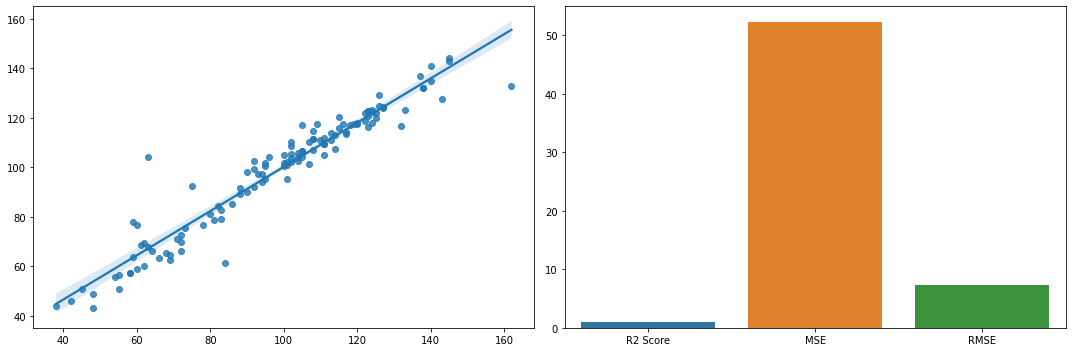

In [90]:
# Evaluating model R2 score, Mean-Squared Error and Root-mean-squared error
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Visualising Evaluations
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.regplot(x=y_test, y=y_pred, ax=axes[0])
sns.barplot(x=["R2 Score", "MSE", "RMSE"], y=[r2, mse, rmse], ax=axes[1])
plt.tight_layout()
plt.show()

In [91]:
print(y_test)

[[107.]
 [ 59.]
 [ 45.]
 [ 55.]
 [124.]
 [ 54.]
 [108.]
 [ 68.]
 [ 69.]
 [ 72.]
 [115.]
 [ 55.]
 [ 80.]
 [ 48.]
 [ 92.]
 [ 84.]
 [ 60.]
 [113.]
 [140.]
 [114.]
 [111.]
 [ 81.]
 [ 95.]
 [105.]
 [101.]
 [108.]
 [118.]
 [ 86.]
 [ 95.]
 [101.]
 [ 88.]
 [138.]
 [124.]
 [ 58.]
 [ 92.]
 [ 38.]
 [115.]
 [ 93.]
 [101.]
 [145.]
 [137.]
 [ 83.]
 [ 62.]
 [113.]
 [102.]
 [111.]
 [ 75.]
 [123.]
 [117.]
 [104.]
 [120.]
 [ 96.]
 [ 90.]
 [122.]
 [ 71.]
 [105.]
 [ 64.]
 [ 78.]
 [100.]
 [104.]
 [109.]
 [100.]
 [140.]
 [123.]
 [105.]
 [ 69.]
 [108.]
 [ 63.]
 [138.]
 [102.]
 [116.]
 [ 58.]
 [ 59.]
 [ 92.]
 [108.]
 [ 88.]
 [105.]
 [127.]
 [104.]
 [ 60.]
 [120.]
 [126.]
 [ 82.]
 [ 62.]
 [102.]
 [ 63.]
 [102.]
 [ 83.]
 [ 73.]
 [ 95.]
 [122.]
 [ 94.]
 [143.]
 [111.]
 [133.]
 [125.]
 [145.]
 [ 72.]
 [ 48.]
 [123.]
 [123.]
 [162.]
 [ 66.]
 [110.]
 [123.]
 [119.]
 [126.]
 [107.]
 [100.]
 [125.]
 [ 61.]
 [ 90.]
 [ 94.]
 [102.]
 [ 72.]
 [111.]
 [124.]
 [117.]
 [ 42.]
 [127.]
 [132.]
 [114.]]


In [92]:
# Printing Evaluations
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("R2 Score:", r2)
print("MSE:", mse)
print("RMSE:", rmse)

R2 Score: 0.9253107637389464
MSE: 52.328616747014166
RMSE: 7.233852137486235


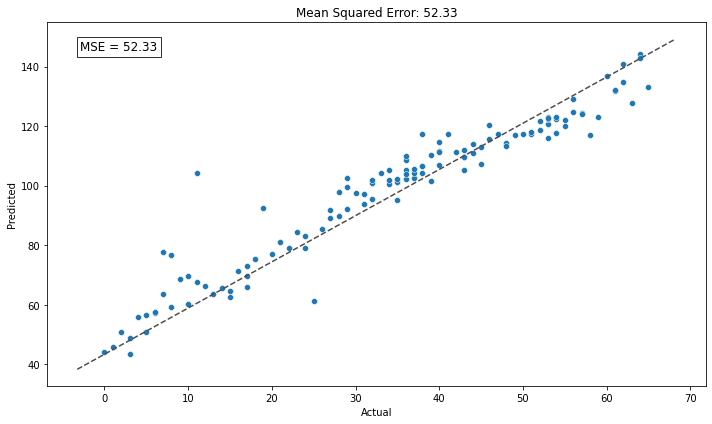

In [93]:
# Used for fitting data for visualisations
le = LabelEncoder()
y_test_fit = le.fit_transform(y_test)

# Plotting larger graph for MSE
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x=y_test_fit, y=y_pred, ax=ax)
ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c=".3")
ax.set_xlabel("Actual")
ax.set_ylabel("Predicted")
ax.set_title("Mean Squared Error: {:.2f}".format(mse))
ax.annotate("MSE = {:.2f}".format(mse), xy=(0.05, 0.95), xycoords='axes fraction',
            fontsize=12, ha='left', va='top', bbox=dict(boxstyle='square', facecolor='white', alpha=0.8))
plt.tight_layout()
plt.show()

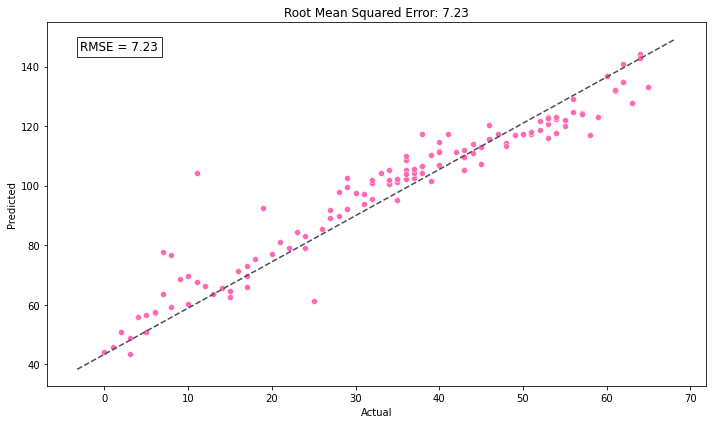

In [94]:
# Plotting larger graph for RMSE
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x=y_test_fit, y=y_pred, ax=ax, color="hotpink")
ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c=".3")
ax.set_xlabel("Actual")
ax.set_ylabel("Predicted")
ax.set_title("Root Mean Squared Error: {:.2f}".format(rmse))
ax.annotate("RMSE = {:.2f}".format(rmse), xy=(0.05, 0.95), xycoords='axes fraction',
            fontsize=12, ha='left', va='top', bbox=dict(boxstyle='square', facecolor='white', alpha=0.8))
plt.tight_layout()
plt.show()

### Changing Training Split

In [95]:
# Creating train/test split
## Test size is 10% 
## Random State is 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Defining XGB Regression Model 
model = xgb.XGBRegressor()

# Fitting training splits
model.fit(X_train.values, y_train)

# Making Predictions
y_pred = model.predict(X_test)

# Printing Evaluations
r2_10 = r2_score(y_test, y_pred)
mse_10 = mean_squared_error(y_test, y_pred)
rmse_10 = np.sqrt(mse_10)
print("R2 Score:", r2_10)
print("MSE:", mse_10)
print("RMSE:", rmse_10)

R2 Score: 0.9374810866847031
MSE: 40.28697940000509
RMSE: 6.347202486135533


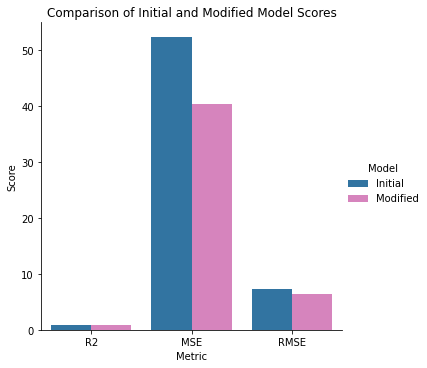

In [96]:
# Creating Visualisation comparing previous R2, MSE and RMSE to new scores

data_dict = {'Metric': ['R2', 'MSE', 'RMSE'], 'Initial': [r2, mse, rmse], 'Modified': [r2_10, mse_10, rmse_10]}
df_2 = pd.DataFrame(data_dict)
df_melted = pd.melt(df_2, id_vars='Metric', var_name='Model', value_name='Score')

sns.catplot(x='Metric', y='Score', hue='Model', data=df_melted, kind='bar', palette=['tab:blue', 'tab:pink'])
plt.title('Comparison of Initial and Modified Model Scores')
plt.show()

### Using GridSearchCV

In [97]:
data = pd.read_csv('dataset_final.csv')

X = data.drop(['Value', 'LOCATION'], axis=1)
y = np.log(data['Value'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Define XGBoost model
model = xgb.XGBRegressor()

# Define hyperparameters for grid search
param_grid = {
    'learning_rate': [0.05, 0.1, 0.2],
    #'n_estimators': [100,300,600,1000],
    #'gamma': [0.1, 1, 2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 0.9, 1],
    'colsample_bytree': [0.8, 0.9, 1]
}

In [98]:
# Using GridSearchCV with Cross Validation
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estim

In [99]:
# Getting best hyperparameters and fitting model
best_params = grid_search.best_params_
model = xgb.XGBRegressor(**best_params)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=3, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [100]:
y_pred = model.predict(X_test)

In [101]:
# Printing New Evaluations
r2_tuned = r2_score(y_test, y_pred)
mse_tuned = mean_squared_error(y_test, y_pred)
rmse_tuned = np.sqrt(mse_tuned)
print("R2 Score:", r2_tuned)
print("MSE:", mse_tuned)
print("RMSE:", rmse_tuned)

R2 Score: 0.9697564286771346
MSE: 0.002995424205275527
RMSE: 0.05473046871054118


In [102]:
print(best_params)

{'colsample_bytree': 1, 'learning_rate': 0.2, 'max_depth': 3, 'min_child_weight': 3, 'subsample': 0.8}


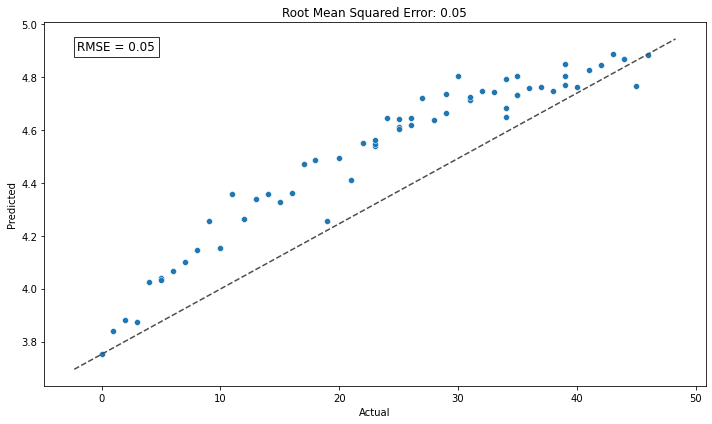

In [103]:
# Plotting New RMSE Score

# Used for fitting data for visualisations
le = LabelEncoder()
y_test_fit = le.fit_transform(y_test)

fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x=y_test_fit, y=y_pred, ax=ax)
ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c=".3")
ax.set_xlabel("Actual")
ax.set_ylabel("Predicted")
ax.set_title("Root Mean Squared Error: {:.2f}".format(rmse_tuned))
ax.annotate("RMSE = {:.2f}".format(rmse_tuned), xy=(0.05, 0.95), xycoords='axes fraction',
            fontsize=12, ha='left', va='top', bbox=dict(boxstyle='square', facecolor='white', alpha=0.8))
plt.tight_layout()
plt.show()

### L1 Regularisation

In [104]:
# L1 Regularisation
model = xgb.XGBRegressor(objective='reg:squarederror', alpha=0.1, **best_params)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [105]:
# Printing New Evaluations
r2_l1 = r2_score(y_test, y_pred)
mse_l1 = mean_squared_error(y_test, y_pred)
rmse_l1 = np.sqrt(mse_l1)
print("R2 Score:", r2_l1)
print("MSE:", mse_l1)
print("RMSE:", rmse_l1)

R2 Score: 0.9703781677820037
MSE: 0.0029338450900245777
RMSE: 0.054164980291924576


### L2 Regularisation

In [106]:
# L2 Regularisation 
model = xgb.XGBRegressor(objective='reg:squarederror', reg_lambda=0.1, **best_params)

model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

In [107]:
# Printing New Evaluations
r2_l2 = r2_score(y_test, y_pred)
mse_l2 = mean_squared_error(y_test, y_pred)
rmse_l2 = np.sqrt(mse_l2)
print("R2 Score:", r2_l2)
print("MSE:", mse_l2)
print("RMSE:", rmse_l2)

R2 Score: 0.9639284883522841
MSE: 0.003572642858773646
RMSE: 0.059771589060134966


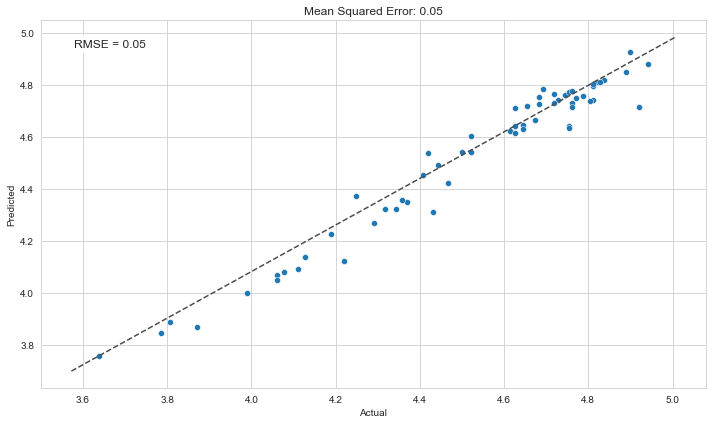

In [111]:
# Plotting New RMSE Score
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, ax=ax)
ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c=".3")
ax.set_xlabel("Actual")
ax.set_ylabel("Predicted")
ax.set_title("Mean Squared Error: {:.2f}".format(rmse_l1))
ax.annotate("RMSE = {:.2f}".format(rmse_l1), xy=(0.05, 0.95), xycoords='axes fraction',
            fontsize=12, ha='left', va='top', bbox=dict(boxstyle='square', facecolor='white', alpha=0.8))
plt.tight_layout()
plt.show()

## Comparing RMSE Scores from XGBoost Models

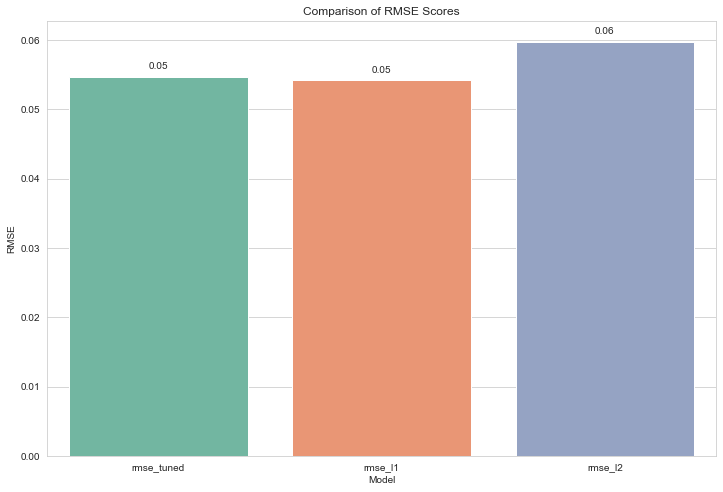

In [109]:
# Allocating RMSE scores into Dictionary
#rmse_scores = {"rmse": rmse, "rmse_tuned": rmse_tuned, "rmse_l1": rmse_l1, "rmse_l2": rmse_l2}
rmse_scores = {"rmse_tuned": rmse_tuned, "rmse_l1": rmse_l1, "rmse_l2": rmse_l2}


# Converting Ditionary into DataFrame
df_rmse = pd.DataFrame.from_dict(rmse_scores, orient="index", columns=["RMSE"])
df_rmse = df_rmse.reset_index()
df_rmse = df_rmse.rename(columns={"index": "Model"})

# Creating visualisation
sns.set_style("whitegrid")

plt.figure(figsize=(12,8))

ax = sns.barplot(x="Model", y="RMSE", data=df_rmse, palette="Set2")

plt.title("Comparison of RMSE Scores")
plt.xlabel("Model")
plt.ylabel("RMSE")

for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha="center", va="center", xytext=(0, 10), textcoords="offset points")

plt.show()